<a href="https://colab.research.google.com/github/PearlSikka/Prediction-cellular-composition/blob/main/Predicting_cellular_composition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt                                                   #for plotting images 
import numpy as np                                                                #library for mathematical operations            
from PIL import Image                                                             
import glob                                                                       #for reading files
import os                                                                         #for performing os operations

import matplotlib.image as mpimg                                                                                                                  #opencv
import pandas as pd
import skimage.measure                                                             
from skimage.color import rgb2hed                                                 #for color transform images
import skimage
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt

import random as rng                                                              #to generate random seed
rng.seed(12345)

from google.colab.patches import cv2_imshow
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error                          #performance metrics  
from scipy.stats import pearsonr, spearmanr 

import keras
from keras.models import Sequential                                               #keras model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import metrics
import tensorflow as tf

from skimage.feature import greycomatrix, greycoprops
from skimage import io
from skimage.color import rgb2gray


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

data_dir='drive/My Drive/DM_CW2/CoNIC_Challenge/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X = np.load(data_dir+ "images.npy")           #read images
Y = pd.read_csv(data_dir+ 'counts.csv')       #read cell counts
F = np.loadtxt('split.txt')                   #read fold information

**Question No. 1: (Data Analysis)**

**i. How many examples are there in each fold?**

In [ ]:
values, counts = np.unique(F, return_counts=True)
cnt=pd.DataFrame({'Fold No.':values, 'Count of Examples': counts})
print(cnt.to_string(index=False))

 Fold No.  Count of Examples
      1.0               1622
      2.0               1751
      3.0               1608


**ii. Show some image examples using plt.imshow. Describe your observations on what you see in the images and how it correlates with the cell counts of different types of cells especially T3 cells. [2 marks]**

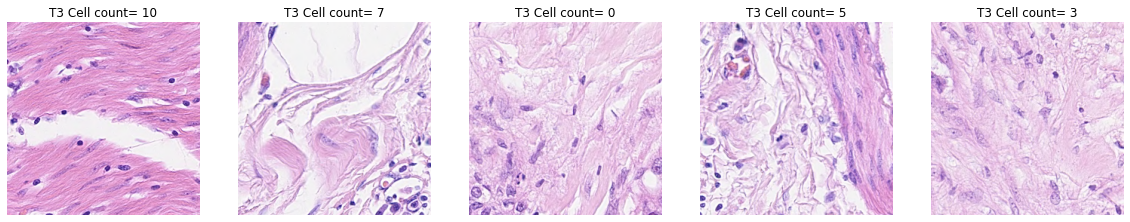

In [ ]:
fig = plt.figure(figsize=(20,7))
 
for i in range(5):
    r = np.random.randint(100)                                                   #returning index 
    plt.subplot(1,5, i+1)                                                              
    plt.axis('off')
    plt.title('T3 Cell count= '+ str(Y['lymphocyte'][r]))                         
    plt.imshow(X[r])

plt.show()

Looking at the images above, it can be seen that the cell count T3 increases where there are more small purple spherical cells visible. These cells are not too big in size and are colored with dark purple stain. 

**iii. For each fold, plot the histogram of counts of each cell type separately (6 plots in total). How many images have counts within each of the following bins? [4 marks]**

0, 1-5, 6-10, 11-20, 21-20, 31-40, 41-50, >50

**For Fold=1**

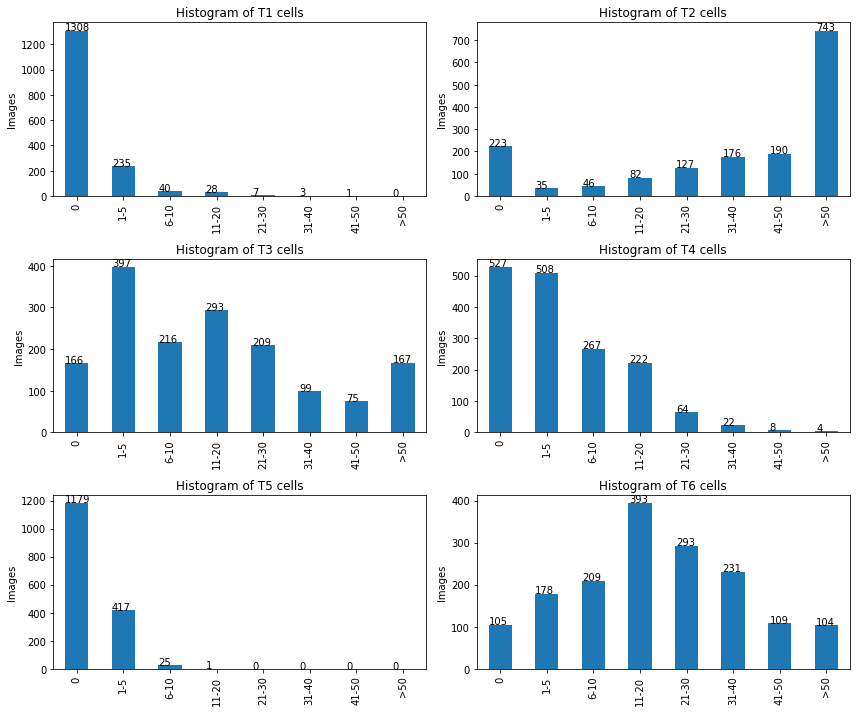

In [ ]:
index= np.where(F==1)                                                             #filtering fold-1 indices

fig = plt.figure(figsize=(12,10))

bins = [-1, 0, 5, 10, 20, 30, 40, 50, np.inf]                                     #creating bins
names = ['0','1-5','6-10', '11-20', '21-30', '31-40', '41-50', '>50']             #label bins      
for i in range(6):
    cnt_T= Y.iloc[:,i][index[0]]  
    fig = plt.subplot(3, 2, i+1) 
    age_binned = pd.cut(cnt_T, bins, labels=names).value_counts().sort_index()    #grouping counts
    ax= age_binned.plot(kind='bar')
    for p in ax.patches:
      ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005)) 
    plt.title('Histogram of T' + str(i+1)+' cells' )
    plt.ylabel('Images')
    plt.tight_layout()

plt.show()

**For Fold=2**

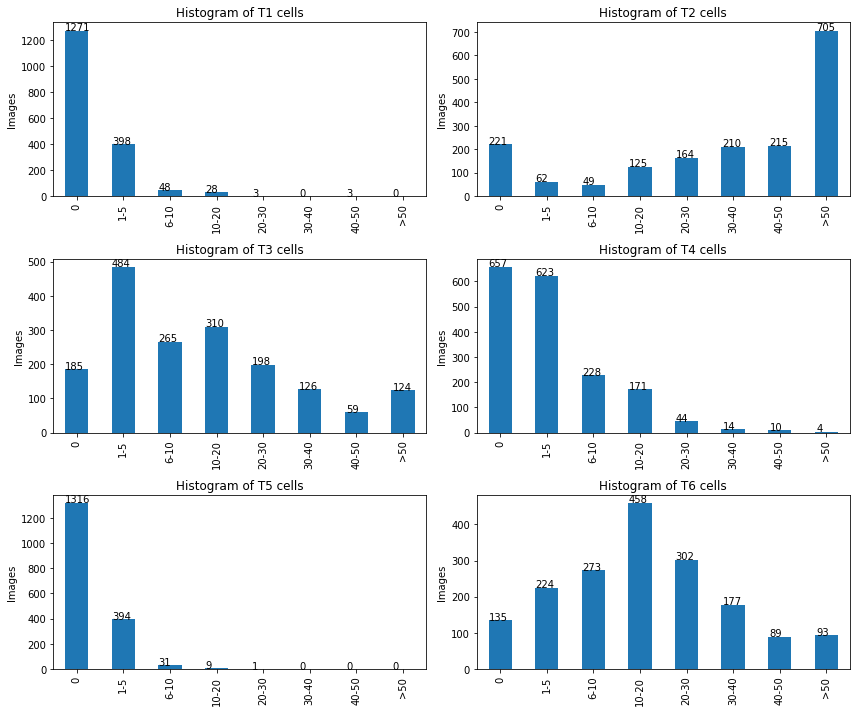

In [ ]:
index= np.where(F==2)

fig = plt.figure(figsize=(12,10))

bins = [-1, 0, 5, 10, 20, 30, 40, 50, np.inf] 
names = ['0','1-5','6-10', '10-20', '20-30', '30-40', '40-50', '>50']
for i in range(6):
    cnt_T= Y.iloc[:,i][index[0]]  
    fig = plt.subplot(3, 2, i+1) 
    age_binned = pd.cut(cnt_T, bins, labels=names).value_counts().sort_index()
    ax= age_binned.plot(kind='bar')
    for p in ax.patches:
      ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005)) 
    plt.title('Histogram of T' + str(i+1)+' cells' )
    plt.ylabel('Images')
    plt.tight_layout()

plt.show()

**For Fold=3**

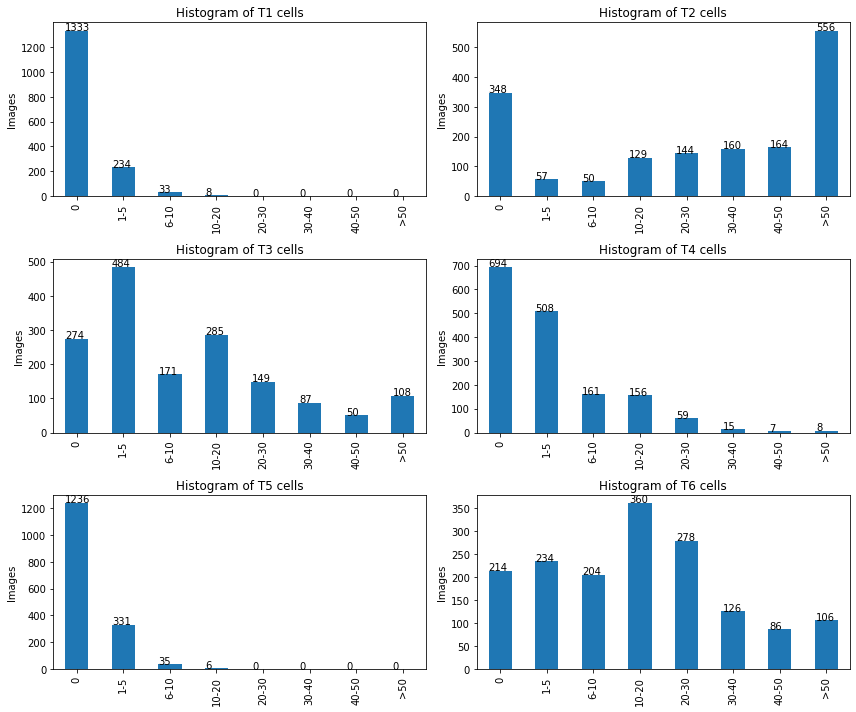

In [ ]:
index= np.where(F==3)

fig = plt.figure(figsize=(12,10))

bins = [-1, 0, 5, 10, 20, 30, 40, 50, np.inf] 
names = ['0','1-5','6-10', '10-20', '20-30', '30-40', '40-50', '>50']
for i in range(6):
    cnt_T= Y.iloc[:,i][index[0]]  
    fig = plt.subplot(3, 2, i+1) 
    age_binned = pd.cut(cnt_T, bins, labels=names).value_counts().sort_index()
    ax= age_binned.plot(kind='bar')
    for p in ax.patches:
      ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005)) 
    plt.title('Histogram of T' + str(i+1)+' cells' )
    plt.ylabel('Images')
    plt.tight_layout()

plt.show()

**iv. Pre-processing: Convert and show a few images from RGB space to HED space and show the H-channel which should indicate cellular nuclei.[5 marks]**

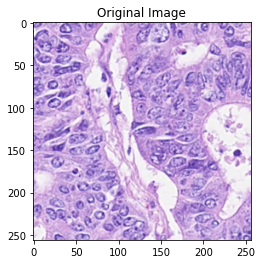

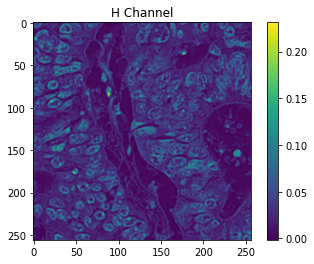

In [ ]:
I = X[0]
I_hed = rgb2hed(I)                                                                #convert to HED
plt.imshow(I)
plt.title('Original Image')
plt.show()
I_h = I_hed[:,:,0]
plt.figure()
plt.imshow(I_h)
plt.colorbar()
plt.title('H Channel')
plt.show()


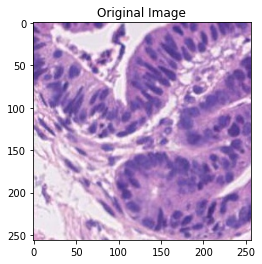

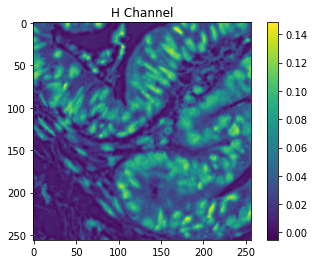

In [ ]:
I = X[4035]
I_hed = rgb2hed(I)                                                                #convert to HED
plt.imshow(I)
plt.title('Original Image')
plt.show()
I_h = I_hed[:,:,0] 
plt.figure()
plt.imshow(I_h) 
plt.colorbar() 
plt.title('H Channel')
plt.show()

**v. Do a scatter plot of the average of the H-channel for each image vs. its cell count of a certain type for images in Fold-1 (6 plots in total). Do you think this feature would be useful in your regression model? Explain your reasoning. [4 marks]**





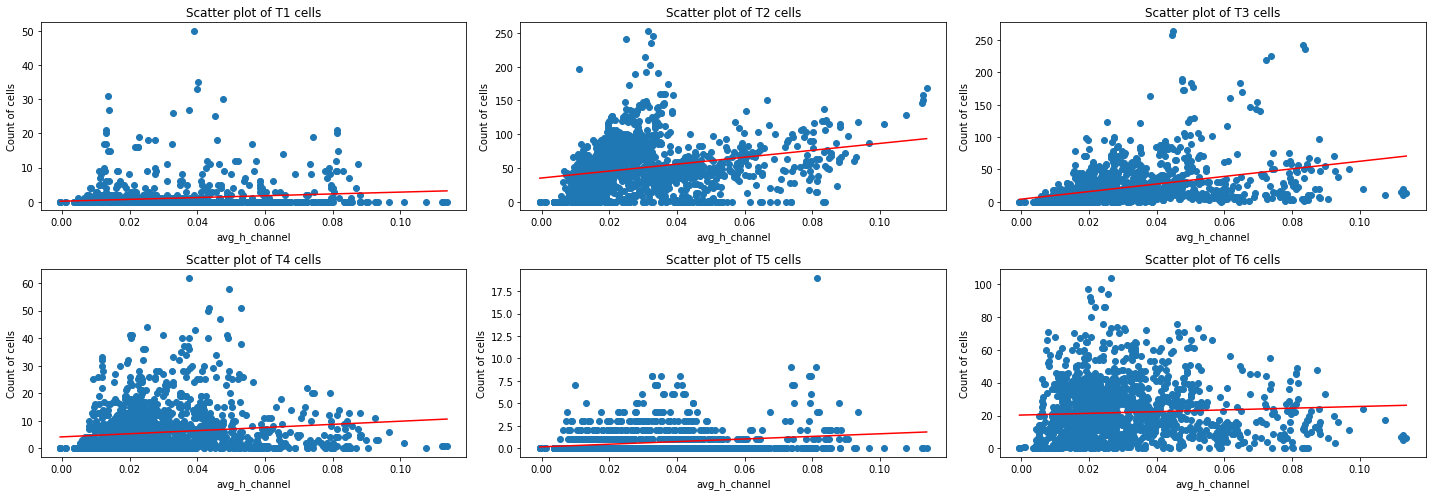

In [ ]:
avg_h_channel=[]
index= np.where(F==1)

for ind in index[0]:
  I_hed = rgb2hed(X[ind])                                                      
  I_h =   I_hed[:,:,0]
  avg_h_channel.append(np.mean(I_h))

fig = plt.figure(figsize=(20,7))

for i in range(6):
    cnt_T= Y.iloc[:,i][index[0]]
    plt.subplot(2,3, i+1)                                                              
    plt.title('Scatter plot of T' + str(i+1)+' cells' )
    plt.scatter(avg_h_channel, cnt_T) 
    plt.ylabel('Count of cells')
    plt.xlabel('avg_h_channel')
    plt.plot(np.unique(avg_h_channel), np.poly1d(np.polyfit(avg_h_channel, cnt_T, 1))(np.unique(avg_h_channel)), color="Red")
    plt.tight_layout()
plt.show()


The scatter plot shows a positive correlation between the average H channel and the count of the T3 cells. Higher the average H value, more is the count of T3 cells. Hence, using average of H-channel would be a useful feature while running regression model to predict the target variable (count of T3 cells). 

**vi. What performance metrics can you use for this problem? Which one will be the best performance metric for this problem? Please give reasoning. [3 marks]**

Since the problem is to count the number of cells, which is a regression problem, there are several metrics that can be used to evaluate the model's performance. 

1. R Square/Adjusted R Square

R Square measures how much variability in dependent variable can be explained by the model. It is the square of the Correlation Coefficient(R) and that is why it is called R Square.

2. Mean Square Error(MSE)/Root Mean Square Error(RMSE)

Mean Square Error is an absolute measure of the goodness for the fit. MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. Root Mean Square Error(RMSE) is the square root of MSE.

3. Mean Absolute Error(MAE)

Mean Absolute Error(MAE) is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of the absolute value of error.


Since the number of features (256,256,3) are large for our problem. It would be suitable to use **R Score/ Adjusted R score** as it will penalize additional independent variables added to the model and adjust the metric to prevent overfitting issues.  


**Question No. 2: (Feature Extraction and Classical Regression)**

**i. Extract features from a given image. Specifically, calculate the:
a. average of the “H”, red, green and blue channels**

In [ ]:
img = X[0]                                                                 
red_channel   = img[:, :, 0]                                                      #red channel
green_channel = img[:,:,1]                                                        #green channel
blue_channel  = img[:,:, 2]                                                       #blue channel    
I_hed = rgb2hed(img)                                                    
I_h =   I_hed[:,:,0]                                                              #h channel
print(f'Avg of H channel for an image: {np.mean(I_h)}')
print(f'Avg of Red channel : {np.mean(red_channel)}')
print(f'Avg of Green channel for an image: {np.mean(green_channel)}')
print(f'Avg of Blue channel : {np.mean(blue_channel)}')

Avg of H channel for an image: 0.028604840310338095
Avg of Red channel : 197.6982421875
Avg of Green channel for an image: 170.0299835205078
Avg of Blue channel : 220.4614715576172


**b. variance of the “H”, red, green and blue channels**


In [ ]:
print(f'Var of H channel for an image: {np.var(I_h)}')
print(f'Var of Red channel : {np.var(red_channel)}')
print(f'Var of Green channel for an image: {np.var(green_channel)}')
print(f'Var of Blue channel : {np.var(blue_channel)}')

Var of H channel for an image: 0.0005122578763266822
Var of Red channel : 1331.3352422714233
Var of Green channel for an image: 1876.0160229855683
Var of Blue channel : 481.99875969975255


**c. entropy of the “H”, red, green and blue channels**

In [ ]:
print(f'Shannon entropy of H channel for an image: {skimage.measure.shannon_entropy(I_h)}')
print(f'Shannon entropy of Red channel for an image: {skimage.measure.shannon_entropy(red_channel)}')
print(f'Shannon entropy of Green channel for an image: {skimage.measure.shannon_entropy(green_channel)}')
print(f'Shannon entropy of Blue channel for an image: {skimage.measure.shannon_entropy(blue_channel)}')

Shannon entropy of H channel for an image: 15.118937088644648
Shannon entropy of Red channel for an image: 7.063311359419419
Shannon entropy of Green channel for an image: 7.343394959650146
Shannon entropy of Blue channel for an image: 6.34492930900855


**d. Any other features that you think can be useful for this work. Describe your reasoning for using these features.**

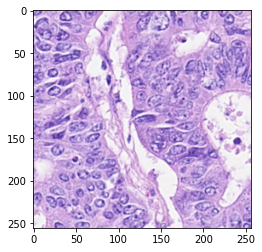

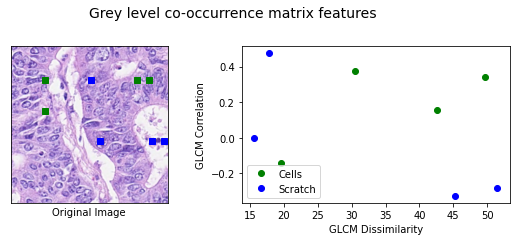

In [ ]:
PATCH_SIZE = 10

img = X[0]
gray = rgb2gray(img)                                                              #taking the gray scale image
plt.imshow(img)

GLCM = greycomatrix(gray.astype(int), [1], [0, np.pi/4, np.pi/2], levels=256)     #running GLCM algorithm 

# selecting patches from texture areas of the image
cell_locations = [(50, 50), (50, 220), (50, 200), (100, 50)]
cell_patches = []
for loc in cell_locations:
    cell_patches.append(img[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from sky areas of the image
scratch_locations = [(50, 125), (150, 140), (150, 225), (150, 245)]
scratch_patches = []
for loc in scratch_locations:
    scratch_patches.append(img[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

# computing GLCM properties 
diss_sim = []
corr = []
for patch in (cell_patches + scratch_patches):
    glcm = greycomatrix(patch[:,:,0], distances=[5], angles=[0], levels=256)    #calculating greycomatrix for distance=5 and angles=0 
    diss_sim.append(greycoprops(glcm, 'dissimilarity')[0, 0])             
    corr.append(greycoprops(glcm, 'correlation')[0, 0])

# creating figure
fig = plt.figure(figsize=(8, 8))

# displaying original image with locations of patches
axes = fig.add_subplot(3, 2, 1)
axes.imshow(img, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in cell_locations:
    axes.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in scratch_locations:
    axes.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
axes.set_xlabel('Original Image')
axes.set_xticks([])
axes.set_yticks([])
axes.axis('image')

# for each patch, plotting (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(diss_sim[:len(cell_patches)], corr[:len(cell_patches)], 'go',
        label='Cells')
ax.plot(diss_sim[len(cell_patches):], corr[len(cell_patches):], 'bo',
        label='Scratch')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

As can be seen in the above texture analysis using GLCM, the texture points are important to gain features from the image. GLCM Dissimilarity v/s GLCM correlation plot shows how points with greater texture form a cluster in green. Texture provides as an interesting feature to partition images into regions of interest and to classify those regions. 

So, for building the model, I'll be using GLCM features (Contrast, Energy, Correlation, Homogeneity, Dissimilarity)

**Plot the scatter plot and calculate the correlation coefficient of each feature in Q(2i,a-c) you obtain vs. the target variable (cell count) across all images. Which features do you think are important? Give your reasoning. [20 marks]**

Since Fold-3 is being used as test set, the feature analysis and selection has been done on Fold-1 and Fold-2 images. 

In [ ]:
#Extracting features for all training images from Fold-1 and Fold-2
index= np.where((F == 1) | (F == 2))                                              #taking fold-1 and fold-2 indices
T3_cell_count= Y['lymphocyte'][index[0]]

avg_h_channel= []
avg_red_channel=[]
avg_green_channel=[]
avg_blue_channel=[]

var_h_channel=[]
var_red_channel=[]
var_green_channel=[]
var_blue_channel=[]

entropy_h_channel=[]
entropy_red_channel=[]
entropy_green_channel=[]
entropy_blue_channel=[]

for ind in index[0]:
  img= X[ind]
  I_hed = rgb2hed(img) 
  red_channel   = img[:, :, 0]
  green_channel = img[:, :, 1]
  blue_channel  = img[:, :, 2]
  I_h =   I_hed[:,:,0]
  avg_h_channel.append(np.mean(I_h))
  avg_red_channel.append(np.mean(red_channel))
  avg_green_channel.append(np.mean(green_channel))
  avg_blue_channel.append(np.mean(blue_channel))
  var_h_channel.append(np.var(I_h))
  var_red_channel.append(np.var(red_channel))
  var_green_channel.append(np.var(green_channel))
  var_blue_channel.append(np.var(blue_channel))
  entropy_h_channel.append(skimage.measure.shannon_entropy(I_h))
  entropy_red_channel.append(skimage.measure.shannon_entropy(red_channel))
  entropy_green_channel.append(skimage.measure.shannon_entropy(green_channel))
  entropy_blue_channel.append(skimage.measure.shannon_entropy(blue_channel))


**Scatter plot of features v/s count of T3 cells**

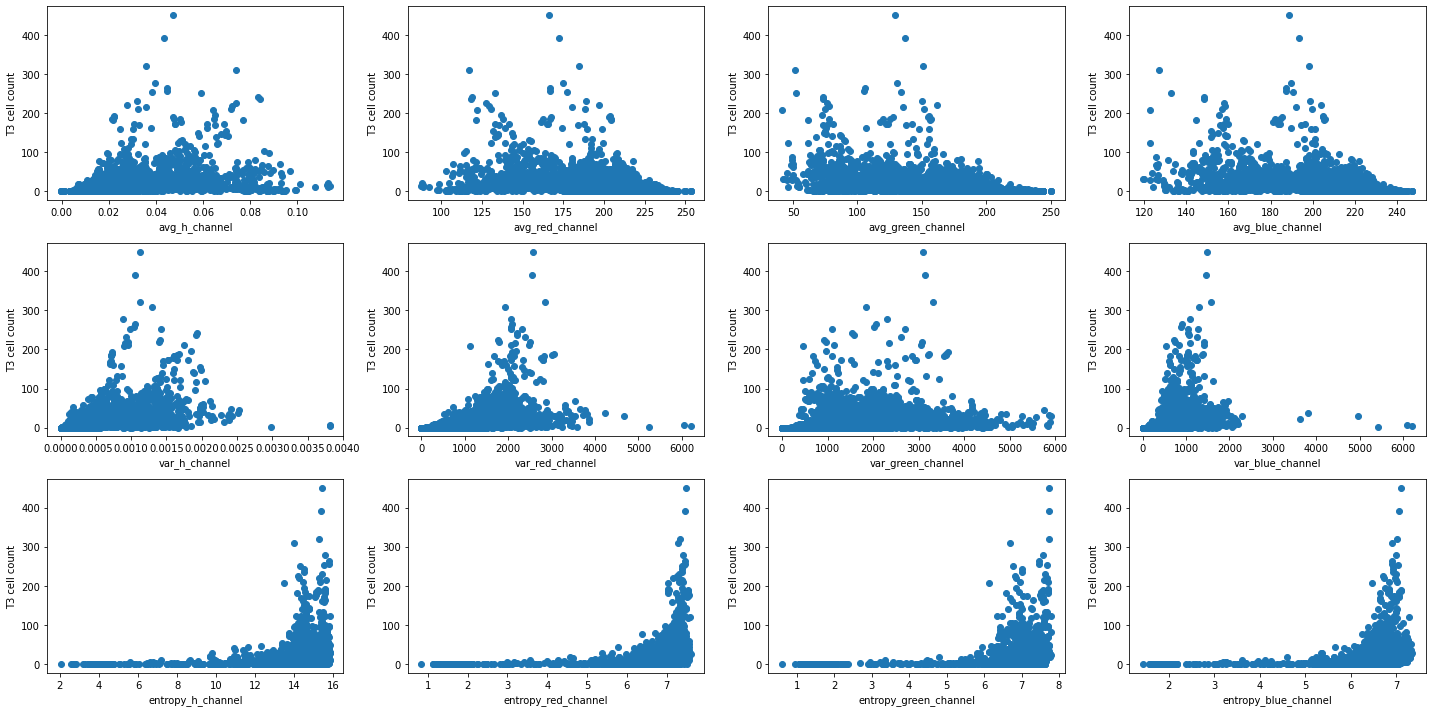

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(20,10))

axs[0, 0].scatter(avg_h_channel, T3_cell_count)
axs[0, 0].set_xlabel('avg_h_channel')
axs[0, 0].set_ylabel('T3 cell count')
axs[0, 1].scatter(avg_red_channel, T3_cell_count)
axs[0, 1].set_xlabel('avg_red_channel')
axs[0, 1].set_ylabel('T3 cell count')
axs[0, 2].scatter(avg_green_channel, T3_cell_count)
axs[0, 2].set_xlabel('avg_green_channel')
axs[0, 2].set_ylabel('T3 cell count')
axs[0, 3].scatter(avg_blue_channel, T3_cell_count)
axs[0, 3].set_xlabel('avg_blue_channel')
axs[0, 3].set_ylabel('T3 cell count')
axs[1, 0].scatter(var_h_channel, T3_cell_count)
axs[1, 0].set_xlabel('var_h_channel')
axs[1, 0].set_ylabel('T3 cell count')
axs[1, 1].scatter(var_red_channel, T3_cell_count)
axs[1, 1].set_xlabel('var_red_channel')
axs[1, 1].set_ylabel('T3 cell count')
axs[1, 2].scatter(var_green_channel, T3_cell_count)
axs[1, 2].set_xlabel('var_green_channel')
axs[1, 2].set_ylabel('T3 cell count')
axs[1, 3].scatter(var_blue_channel, T3_cell_count)
axs[1, 3].set_xlabel('var_blue_channel')
axs[1, 3].set_ylabel('T3 cell count')
axs[2, 0].scatter(entropy_h_channel, T3_cell_count)
axs[2, 0].set_xlabel('entropy_h_channel')
axs[2, 0].set_ylabel('T3 cell count')
axs[2, 1].scatter(entropy_red_channel, T3_cell_count)
axs[2, 1].set_xlabel('entropy_red_channel')
axs[2, 1].set_ylabel('T3 cell count')
axs[2, 2].scatter(entropy_green_channel, T3_cell_count)
axs[2, 2].set_xlabel('entropy_green_channel')
axs[2, 2].set_ylabel('T3 cell count')
axs[2, 3].scatter(entropy_blue_channel, T3_cell_count)
axs[2, 3].set_xlabel('entropy_blue_channel')
axs[2, 3].set_ylabel('T3 cell count')
plt.tight_layout()

**Pearson correlation score**

In [ ]:
print(f'PC score avg_h_channel and T3 count: {pearsonr(avg_h_channel,T3_cell_count)}')
print(f'PC score avg_red_channel and T3 count: {pearsonr(avg_red_channel,T3_cell_count)}')
print(f'PC score avg_green_channel and T3 count: {pearsonr(avg_green_channel,T3_cell_count)}')
print(f'PC score avg_blue_channel and T3 count: {pearsonr(avg_blue_channel,T3_cell_count)}')
print(f'PC score var_h_channel and T3 count: {pearsonr(var_h_channel,T3_cell_count)}')
print(f'PC score var_red_channel and T3 count: {pearsonr(var_red_channel,T3_cell_count)}')
print(f'PC score var_green_channel and T3 count: {pearsonr(var_green_channel,T3_cell_count)}')
print(f'PC score var_blue_channel and T3 count: {pearsonr(var_blue_channel,T3_cell_count)}')
print(f'PC score entropy_h_channel and T3 count: {pearsonr(entropy_h_channel,T3_cell_count)}')
print(f'PC score entropy_red_channel and T3 count: {pearsonr(entropy_red_channel,T3_cell_count)}')
print(f'PC score entropy_green_channel and T3 count: {pearsonr(entropy_green_channel,T3_cell_count)}')
print(f'PC score entropy_blue_channel and T3 count: {pearsonr(entropy_blue_channel,T3_cell_count)}')

PC score avg_h_channel and T3 count: (0.3477871595888749, 1.681706913959561e-96)
PC score avg_red_channel and T3 count: (-0.369790779095872, 8.541492407750451e-110)
PC score avg_green_channel and T3 count: (-0.39052623072719794, 2.605361009065917e-123)
PC score avg_blue_channel and T3 count: (-0.3711775117038087, 1.1431382566969353e-110)
PC score var_h_channel and T3 count: (0.46527827038781083, 7.7207148106454e-181)
PC score var_red_channel and T3 count: (0.4327251414707126, 5.405078966940397e-154)
PC score var_green_channel and T3 count: (0.15090594126041298, 1.2348198741485507e-18)
PC score var_blue_channel and T3 count: (0.2765228889060292, 2.9272867633949125e-60)
PC score entropy_h_channel and T3 count: (0.20699961313762733, 5.779794108279695e-34)
PC score entropy_red_channel and T3 count: (0.31109504163223217, 1.3610115559655541e-76)
PC score entropy_green_channel and T3 count: (0.2155755678159318, 9.283745138452927e-37)
PC score entropy_blue_channel and T3 count: (0.280899525768

Based on the above feature analysis, for model building, features of H, red, green and blue channels(avg, variance, entropy) will be used as they are highly correlated with the target variable (count of T3 cells). Some features show high positive correlation whereas some show negative correlation with target variable. Negative and positive correlated features are equally important while building the model. GLCM features(Contrast, Energy, Correlation, Homogeneity, Dissimilarity) will also be used for building model.

**ii. Try the following regression models with the features used in part-I. Plot the scatter plot between true and predicted counts for each type of regression model for the test data. Also, report your prediction performance in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) on the test data. [20 Marks]**

In [ ]:
def feature_extraction(img):
  I_hed = rgb2hed(img)                                                  
  I_h =   I_hed[:,:,0]
  gray = rgb2gray(img)                                                           #grayscale
  red = img[:,:,0]
  green = img[:,:,1]
  blue = img[:,:,2]
  avg_h_channel= np.mean(I_h)
  var_h_channel= np.var(I_h)
  entropy= skimage.measure.shannon_entropy(I_h)
  avg_red_channel = np.mean(red)
  var_red_channel = np.var(red)
  entropy_red = skimage.measure.shannon_entropy(red)
  avg_green_channel = np.mean(green)
  var_green_channel = np.var(green)
  entropy_green = skimage.measure.shannon_entropy(green)
  avg_blue_channel = np.mean(blue)
  var_blue_channel = np.var(blue)
  entropy_blue = skimage.measure.shannon_entropy(blue)

  feat = {}
  feat['Avg_h_channel']= avg_h_channel
  feat['Var_h_channel']= var_h_channel
  feat['Entropy'] = entropy
  feat['Avg_red_channel']= avg_red_channel
  feat['Var_red_channel']= var_red_channel
  feat['Entropy_red'] = entropy_red
  feat['Avg_green_channel'] = avg_green_channel
  feat['Var_green_channel']= var_green_channel
  feat['Entropy_green'] = entropy_green
  feat['Avg_blue_channel'] = avg_blue_channel
  feat['Var_blue_channel']= var_blue_channel
  feat['Entropy_blue'] = entropy_blue
  GLCM = greycomatrix(gray.astype(int), [1], [0], levels=256)       
  GLCM_Energy = greycoprops(GLCM, 'energy')[0][0]
  feat['Energy'] = GLCM_Energy
  GLCM_corr = greycoprops(GLCM, 'correlation')[0][0]
  feat['Corr'] = GLCM_corr       
  GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0][0]
  feat['Diss_sim'] = GLCM_diss       
  GLCM_hom = greycoprops(GLCM, 'homogeneity')[0][0]
  feat['Homogen'] = GLCM_hom       
  GLCM_contr = greycoprops(GLCM, 'contrast')[0][0]
  feat['Contrast'] = GLCM_contr
  GLCM2 = greycomatrix(gray.astype(int), [3], [0], levels=256)       
  GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0][0]
  feat['Energy2'] = GLCM_Energy2
  GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0][0]
  feat['Corr2'] = GLCM_corr2       
  GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0][0]
  feat['Diss_sim2'] = GLCM_diss2       
  GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0][0]
  feat['Homogen2'] = GLCM_hom2       
  GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0][0]
  feat['Contrast2'] = GLCM_contr2
  GLCM3 = greycomatrix(gray.astype(int), [5], [0], levels=256)       
  GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0][0]
  feat['Energy3'] = GLCM_Energy3
  GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0][0]
  feat['Corr3'] = GLCM_corr3       
  GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0][0]
  feat['Diss_sim3'] = GLCM_diss3       
  GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0][0]
  feat['Homogen3'] = GLCM_hom3       
  GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0][0]
  feat['Contrast3'] = GLCM_contr3
  GLCM4 = greycomatrix(gray.astype(int), [0], [np.pi/4], levels=256)       
  GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0][0]
  feat['Energy4'] = GLCM_Energy4
  GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0][0]
  feat['Corr4'] = GLCM_corr4       
  GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0][0]
  feat['Diss_sim4'] = GLCM_diss4       
  GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0][0]
  feat['Homogen4'] = GLCM_hom4       
  GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0][0]
  feat['Contrast4'] = GLCM_contr4
  
  return feat

In [ ]:
#Extracting features for all training images from Fold-1 and Fold-2 into dataframe
index= np.where((F == 1) | (F == 2))                                              #taking fold-1 and fold-2 indices
image_all_feat_train=[]
image_all_feat_test=[]
for ind in index[0]:
  img= X[ind]
  image_all_feat_train.append(feature_extraction(img)) 
train_X = pd.DataFrame(image_all_feat_train)
train_Y= Y['lymphocyte'][index[0]]

#Extracting features for all test images from Fold-3 into dataframe
index= np.where((F == 3))
for ind in index[0]:
  img= X[ind]
  image_all_feat_test.append(feature_extraction(img))
test_X = pd.DataFrame(image_all_feat_test)
test_Y= Y['lymphocyte'][index[0]]


In [ ]:
train_X.head()

,Avg_h_channel,Var_h_channel,Entropy,Avg_red_channel,Var_red_channel,Entropy_red,Avg_green_channel,Var_green_channel,Entropy_green,Avg_blue_channel,...,Energy3,Corr3,Diss_sim3,Homogen3,Contrast3,Energy4,Corr4,Diss_sim4,Homogen4,Contrast4
0,0.014901,0.000166,14.733505,216.828201,700.185283,6.456972,184.712616,1525.001090,7.157615,220.145798,...,0.999938,-0.000031,0.000062,0.999969,0.000062,0.999969,1.0,0.0,1.0,0.0
1,0.018371,0.000255,15.011508,210.432480,968.860401,6.742927,175.731857,1818.421676,7.314085,216.199799,...,0.999969,-0.000016,0.000031,0.999984,0.000031,0.999985,1.0,0.0,1.0,0.0
2,0.022343,0.000360,15.176679,203.084442,1209.026744,6.968394,163.588150,1786.483288,7.383982,211.209991,...,0.999969,-0.000016,0.000031,0.999984,0.000031,0.999985,1.0,0.0,1.0,0.0
3,0.011796,0.000223,12.880828,224.299576,851.487143,5.956588,196.641907,1897.752842,6.408821,225.250229,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.0,0.0,1.0,0.0
4,0.005643,0.000044,10.701708,238.598755,246.522321,4.754744,228.551178,616.419683,5.115727,237.590729,...,0.999160,-0.000420,0.000840,0.999580,0.000840,0.999573,1.0,0.0,1.0,0.0


In [ ]:
Xtrain= np.asarray(train_X)
Ytrain= np.asarray(train_Y)
Xtest= np.asarray(test_X)
Ytest= np.asarray(test_Y)
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(3373, 32)
(3373,)
(1608, 32)
(1608,)


**Linear Regression (OLS)**

Splitting Fold-1, Fold-2 into training and validation samples whereas testing with performance metrics would be done on Fold-3 samples.

In [ ]:
#splitting into training and validation samples
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Xtrain,Ytrain, random_state=0, test_size = 0.2)

Square root transformation has been applied to count of T3 cells to normalize the skewed data. Taking the square root makes a non-normal variable appear like a normal variable in regression problems. Here, count of T3 cells is right skewed and to make the regression model converge and generalize better, Y train has been applied square root transformation.

In [ ]:
y_train = np.sqrt(y_train)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()   
lr.fit(X_train,y_train)
val_pred= lr.predict(X_val)
val_pred= np.square(val_pred)                                                   #square predictions to bring it back to original scale

print('--------Validation performance-----')

r2_val_OLS= r2_score(y_val, val_pred)
rmse_val_OLS= mean_squared_error(y_val, val_pred, squared=True)
pc_val_OLS= pearsonr(y_val, val_pred)[0]
sc_val_OLS= spearmanr(y_val, val_pred)[0]

print(f'r2_score: {r2_val_OLS}')
print(f'rmse_score:{rmse_val_OLS}')
print(f'pearson corr score: {pc_val_OLS}')
print(f'spearman corr score: {sc_val_OLS}')


--------Validation performance-----
r2_score: 0.302953317514399
rmse_score:454.38364535939087
pearson corr score: 0.5628461965389716
spearman corr score: 0.7127455701432943


**Running predictions on Test Data**

In [ ]:
##running predictions on test data
test_pred= lr.predict(Xtest)
test_pred= np.square(test_pred)                                                   #square pred

r2_test_OLS= r2_score(Ytest, test_pred)
rmse_test_OLS= mean_squared_error(Ytest, test_pred, squared=True)
pc_test_OLS= pearsonr(Ytest, test_pred)[0]
sc_test_OLS= spearmanr(Ytest, test_pred)[0]

df=pd.DataFrame({'model':['OLS'], 'r2 score': [r2_test_OLS], 'rmse': [rmse_test_OLS], 
              'pearson corr score':[pc_test_OLS], 'spearman corr score':[sc_test_OLS]}) 
print(df)

  model  r2 score        rmse  pearson corr score  spearman corr score
0   OLS  0.284121  625.043553              0.5616             0.642111


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


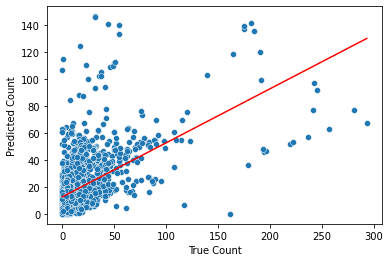

In [ ]:
ax= sns.scatterplot(Ytest, test_pred, palette="deep", )
ax.set(xlabel='True Count', ylabel='Predicted Count')
plt.plot(np.unique(Ytest), np.poly1d(np.polyfit(Ytest, test_pred, 1))(np.unique(Ytest)), color="Red")
plt.show()

**Support Vector Regression**

In [ ]:
from sklearn.svm import SVR
#y_train=y_train.reshape(y_train.shape[0],1)
#y_train= pt.fit_transform(y_train)
svr = SVR(C=7.0, epsilon=0.2, kernel='rbf')                                       #running SVR
svr.fit(X_train,y_train)
val_pred= lr.predict(X_val)
val_pred= np.square(val_pred)

print('--------Validation performance-----')

r2_val_SVR= r2_score(y_val, val_pred)
rmse_val_SVR= mean_squared_error(y_val, val_pred, squared=True)
pc_val_SVR= pearsonr(y_val, val_pred)[0]
sc_val_SVR= spearmanr(y_val, val_pred)[0]

print(f'r2_score: {r2_val_SVR}')
print(f'rmse_score:{rmse_val_SVR}')
print(f'pearson corr score: {pc_val_SVR}')
print(f'spearman corr score: {sc_val_SVR}')


--------Validation performance-----
r2_score: 0.302953317514399
rmse_score:454.38364535939087
pearson corr score: 0.5628461965389716
spearman corr score: 0.7127455701432943


**Predictions on Test Data**

In [ ]:
##running predictions on test data
test_pred= svr.predict(Xtest)
test_pred= np.square(test_pred)

r2_test_SVR= r2_score(Ytest, test_pred)
rmse_test_SVR= mean_squared_error(Ytest, test_pred, squared=True)
pc_test_SVR= pearsonr(Ytest, test_pred)[0]
sc_test_SVR= spearmanr(Ytest, test_pred)[0]

df=pd.DataFrame({'model':['SVR'], 'r2 score': [r2_test_SVR] , 'rmse': [rmse_test_SVR], 
              'pearson corr score':[pc_test_SVR], 'spearman corr score':[sc_test_SVR]}) 
print(df)

  model  r2 score        rmse  pearson corr score  spearman corr score
0   SVR  0.353582  564.396784            0.611692             0.700359


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


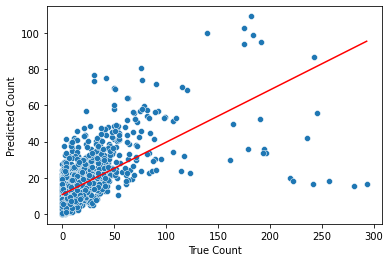

In [ ]:
ax= sns.scatterplot(Ytest, test_pred, palette="deep" )
ax.set(xlabel='True Count', ylabel='Predicted Count')
plt.plot(np.unique(Ytest), np.poly1d(np.polyfit(Ytest, test_pred, 1))(np.unique(Ytest)), color="Red")
plt.show()

**Question No. 3 (Using Convolutional Neural Networks)**

**a. Use a convolutional neural network (in Keras or PyTorch) to solve this problem in much the same was as in part (ii) of Question (2). You are to develop an architecture of the neural network that takes an image directly as input and produces a count as the output corresponding to T3 cells. You are free to choose any network structure as long as you can show that it gives good performance. Report your results on the test examples by plotting the scatter plot between true and predicted counts on the test data. Also, report your results in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score. You will be evaluated on the design of your machine learning model and final performance metrics. Try to get the best test performance you can. Please include convergence plots in your submission showing how does loss change over training epochs. [20 Marks]**

Taking Fold-1 and Fold-2 for training and validation and testing on Fold-3 samples.

In [ ]:
index= np.where((F == 1) | (F == 2))                                              #taking fold-1 and fold-2 
                                                                                  #indices for training
Y_tr= np.asarray(Y['lymphocyte'][index[0]])
Y_tr= Y_tr.reshape(Y_tr.shape[0],1)

X_tr=[]
for ind in index[0]:
  img= X[ind]
  image_resized = resize(img, (img.shape[0] // 2, img.shape[1] // 2),
                       anti_aliasing=True)
  X_tr.append(image_resized)

X_tr= np.asarray(X_tr)
X_tr= X_tr/255.0                                                                #normalized training samples

print(f'Training X samples shape: {X_tr.shape}')
print(f'Training Y samples shape: {Y_tr.shape}')

index= np.where((F == 3))                                                       #taking fold-3 indices for test
Y_test= Y['lymphocyte'][index[0]]

X_test=[]
for ind in index[0]:
  img= X[ind]
  image_resized = resize(img, (img.shape[0] // 2, img.shape[1] // 2),
                       anti_aliasing=True)
  X_test.append(image_resized)

X_test= np.asarray(X_test)
X_test= X_test/255.0                                                             #normalizing
print(f'Test X samples shape: {X_test.shape}')
print(f'Test Y samples shape: {Y_test.shape}')

Training X samples shape: (3373, 128, 128, 3)
Training Y samples shape: (3373, 1)
Test X samples shape: (1608, 128, 128, 3)
Test Y samples shape: (1608,)


In [ ]:
Y_cv_tr= Y_tr.copy()

Since Y_tr has skewed distribution, the training Y samples will be applied square root transformation

In [ ]:
Y_tr= np.sqrt(Y_tr)

In [ ]:
img_rows, img_cols = 128,128

In [ ]:
if K.image_data_format() == 'channels_first':
    X_train = X_tr.reshape(X_tr.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_tr.reshape(X_tr.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

In [ ]:
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

Convolution Neural Network has been built with several layers. Initial layers of Convolution and Max Pooling are used to extract features from image. Dropout layer is added to reduce overfitting and Dense layer has been added to make network deep. Finally, Dense layer with 1 output neuron with linear activation has been used to predict count of T3 cells.

In [ ]:
def countT3model():
  model = Sequential()
  model.add(Conv2D(64, (3, 3), activation='relu', input_shape = input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(32, (3, 3), activation='relu'))                                
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(16, (3, 3), activation='relu'))
 
  model.add(Dropout(0.01))

  model.add(Flatten())
  
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1, activation='linear'))

  model.compile(loss=keras.losses.MeanSquaredError(),   
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                    metrics=[coeff_determination]                               #r2 score used as metric
                   )

  #model.summary()
  return(model)

In [ ]:
batch_size = 50                   
epochs = 20

model = countT3model()
history = model.fit(X_tr, Y_tr,                                                 #fitting model on training set 
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          verbose=1                                                              #validation of model run on validation set
          )

Epoch 1/20
54/54 [==============================] - 7s 93ms/step - loss: 31.6518 - coeff_determination: -5.7578 - val_loss: 7.1188 - val_coeff_determination: -0.5318
Epoch 2/20
54/54 [==============================] - 4s 76ms/step - loss: 6.2315 - coeff_determination: 0.0973 - val_loss: 5.9696 - val_coeff_determination: -0.5470
Epoch 3/20
54/54 [==============================] - 4s 77ms/step - loss: 5.3851 - coeff_determination: 0.2268 - val_loss: 5.7723 - val_coeff_determination: -0.6533
Epoch 4/20
54/54 [==============================] - 4s 76ms/step - loss: 4.8784 - coeff_determination: 0.3005 - val_loss: 6.0718 - val_coeff_determination: -0.6123
Epoch 5/20
54/54 [==============================] - 4s 80ms/step - loss: 4.9920 - coeff_determination: 0.2714 - val_loss: 5.8579 - val_coeff_determination: -0.8017
Epoch 6/20
54/54 [==============================] - 4s 76ms/step - loss: 4.8245 - coeff_determination: 0.2996 - val_loss: 6.8057 - val_coeff_determination: -0.5726
Epoch 7/20
54/

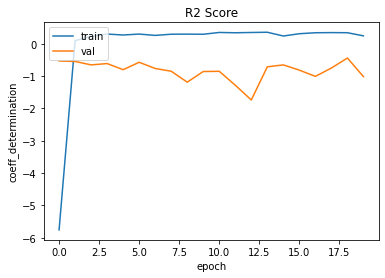

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('R2 Score')
plt.ylabel('coeff_determination')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

R2 score is increasing rapidly for training set whereas for validation set, there are fluctuations across the epochs.

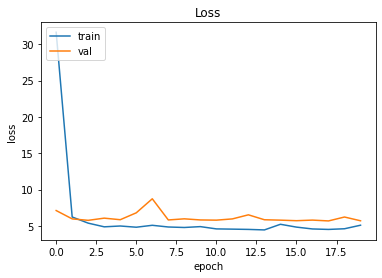

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Loss hits a big plunge from epoch 1 to 2 for training set whereas the validation set sees slow change.

**Running predictions on Test Data**

In [ ]:
#Predictions on test data
y_pred= model.predict(X_test)
y_pred= np.square(y_pred)

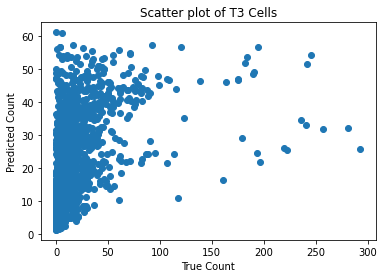

In [ ]:
ax= plt.scatter(Y_test, y_pred)
plt.xlabel('True Count')
plt.ylabel('Predicted Count')
plt.title('Scatter plot of T3 Cells')
plt.show()

**Performance Metrics**

In [ ]:
r2_test_NN= r2_score(Y_test, y_pred)
rmse_test_NN= mean_squared_error(Y_test, y_pred, squared=True)
pc_test_NN= pearsonr(Y_test, y_pred)[0]
sc_test_NN= spearmanr(Y_test, y_pred)[0]

df=pd.DataFrame({'model':['CNN'], 'r2 score': [r2_test_NN], 'rmse': [rmse_test_NN], 
              'pearson corr score':[pc_test_NN], 'spearman corr score':[sc_test_NN]}) 
print(df)

  model  r2 score        rmse     pearson corr score  spearman corr score
0   CNN  0.189876  707.330452  [0.45344510135907606]             0.684646


**b. Use three fold cross validation with your optimal network architecture to predict the counts of T3 cells. Do 3-fold cross-validation with the given folds and report the results for each test fold in the form of separate predicted-vs-actual count scatter plots (3 folds so 3 plots in total) using your model and report your results in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score for each fold separately. [5 Marks]**

**CV Fold 1 -- Train and validate on Fold 1 and Fold 2, Test on Fold 3**

In [ ]:
index= np.where((F == 1) | (F == 2))                                            #taking fold-1 and fold-2 
                                                                                #indices for training
Y_tr= np.asarray(Y['lymphocyte'][index[0]])
Y_tr= Y_tr.reshape(Y_tr.shape[0],1)

X_tr=[]
for ind in index[0]:
  img= X[ind]
  image_resized = resize(img, (img.shape[0] // 2, img.shape[1] // 2),
                       anti_aliasing=True)
  X_tr.append(image_resized)

X_tr= np.asarray(X_tr)
X_tr= X_tr/255.0                                                                #normalized training samples

print(f'Training X samples shape: {X_tr.shape}')
print(f'Training Y samples shape: {Y_tr.shape}')

index= np.where((F == 3))                                                       #taking fold-3 indices for test
Y_test= Y['lymphocyte'][index[0]]

X_test=[]
for ind in index[0]:
  img= X[ind]
  image_resized = resize(img, (img.shape[0] // 2, img.shape[1] // 2),
                       anti_aliasing=True)
  X_test.append(image_resized)

X_test= np.asarray(X_test)
X_test= X_test/255.0                                                            #normalizing
print(f'Test X samples shape: {X_test.shape}')
print(f'Test Y samples shape: {Y_test.shape}')

Training X samples shape: (3373, 128, 128, 3)
Training Y samples shape: (3373, 1)
Test X samples shape: (1608, 128, 128, 3)
Test Y samples shape: (1608,)


In [ ]:
Y_tr= np.sqrt(Y_tr)

In [ ]:
batch_size = 50                   
epochs = 10

model = countT3model()
history = model.fit(X_tr, Y_tr,                                                 #fitting model on training set 
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          verbose=1                                            #validation of model run on validation set
          )

Epoch 1/10
54/54 [==============================] - 5s 82ms/step - loss: 30.7528 - coeff_determination: -3.4602 - val_loss: 8.3461 - val_coeff_determination: -0.7334
Epoch 2/10
54/54 [==============================] - 4s 77ms/step - loss: 7.1849 - coeff_determination: -0.0343 - val_loss: 6.0605 - val_coeff_determination: -0.6303
Epoch 3/10
54/54 [==============================] - 4s 78ms/step - loss: 6.5871 - coeff_determination: 0.0528 - val_loss: 5.8004 - val_coeff_determination: -0.5693
Epoch 4/10
54/54 [==============================] - 4s 77ms/step - loss: 5.6589 - coeff_determination: 0.1821 - val_loss: 5.7497 - val_coeff_determination: -0.6277
Epoch 5/10
54/54 [==============================] - 4s 77ms/step - loss: 5.1086 - coeff_determination: 0.2762 - val_loss: 7.3028 - val_coeff_determination: -0.5576
Epoch 6/10
54/54 [==============================] - 4s 77ms/step - loss: 4.9456 - coeff_determination: 0.2842 - val_loss: 5.7689 - val_coeff_determination: -0.8893
Epoch 7/10
54

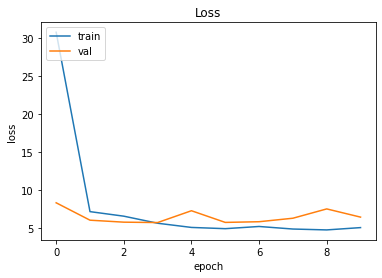

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Predictions on test data
y_pred= model.predict(X_test)
y_pred= np.square(y_pred)

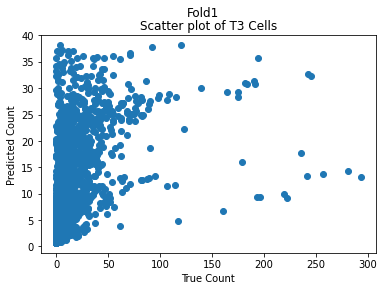

In [ ]:
ax= plt.scatter(Y_test, y_pred)
plt.xlabel('True Count')
plt.ylabel('Predicted Count')
plt.title('Scatter plot of T3 Cells')
plt.suptitle('Fold1')
plt.show()

**Performance Metrics**

In [ ]:
r2_test_NN1= r2_score(Y_test, y_pred)
rmse_test_NN1= mean_squared_error(Y_test, y_pred, squared=True)
pc_test_NN1= pearsonr(Y_test, y_pred)[0]
sc_test_NN1= spearmanr(Y_test, y_pred)[0]

df=pd.DataFrame({'model':['CNN'], 'r2 score': [r2_test_NN1], 'rmse': [rmse_test_NN1], 
              'pearson corr score':[pc_test_NN1], 'spearman corr score':[sc_test_NN1]}) 
print(df)

  model  r2 score        rmse     pearson corr score  spearman corr score
0   CNN  0.135765  754.575229  [0.41532001775690586]             0.667292


**CV Fold 2 -- Train and validate on Fold 1 and Fold 3, Test on Fold 2**

In [ ]:
index= np.where((F == 1) | (F == 3))                                            #taking fold-1 and fold-3 
                                                                                #indices for training
Y_tr= np.asarray(Y['lymphocyte'][index[0]])
Y_tr= Y_tr.reshape(Y_tr.shape[0],1)

X_tr=[]
for ind in index[0]:
  img= X[ind]
  image_resized = resize(img, (img.shape[0] // 2, img.shape[1] // 2),
                       anti_aliasing=True)
  X_tr.append(image_resized)

X_tr= np.asarray(X_tr)
X_tr= X_tr/255.0                                                                #normalized training samples

print(f'Training X samples shape: {X_tr.shape}')
print(f'Training Y samples shape: {Y_tr.shape}')

index= np.where((F == 2))                                                       #taking fold-2 indices for test
Y_test= Y['lymphocyte'][index[0]]

X_test=[]
for ind in index[0]:
  img= X[ind]
  image_resized = resize(img, (img.shape[0] // 2, img.shape[1] // 2),
                       anti_aliasing=True)
  X_test.append(image_resized)

X_test= np.asarray(X_test)
X_test= X_test/255.0                                                            #normalizing
print(f'Test X samples shape: {X_test.shape}')
print(f'Test Y samples shape: {Y_test.shape}')

Training X samples shape: (3230, 128, 128, 3)
Training Y samples shape: (3230, 1)
Test X samples shape: (1751, 128, 128, 3)
Test Y samples shape: (1751,)


In [ ]:
Y_tr= np.sqrt(Y_tr)

In [ ]:
batch_size = 50                   
epochs = 10

model = countT3model()
history = model.fit(X_tr, Y_tr,                                                 #fitting model on training set 
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          verbose=1                                            #validation of model run on validation set
          )

Epoch 1/10
52/52 [==============================] - 64s 1s/step - loss: 13.5115 - coeff_determination: -1.0044 - val_loss: 7.0651 - val_coeff_determination: -0.0694
Epoch 2/10
52/52 [==============================] - 63s 1s/step - loss: 5.9033 - coeff_determination: 0.1060 - val_loss: 10.2422 - val_coeff_determination: -0.7420
Epoch 3/10
52/52 [==============================] - 63s 1s/step - loss: 4.7904 - coeff_determination: 0.2833 - val_loss: 6.7573 - val_coeff_determination: -0.0877
Epoch 4/10
52/52 [==============================] - 63s 1s/step - loss: 4.4276 - coeff_determination: 0.3299 - val_loss: 8.3987 - val_coeff_determination: -0.3885
Epoch 5/10
52/52 [==============================] - 63s 1s/step - loss: 4.5699 - coeff_determination: 0.3040 - val_loss: 7.0251 - val_coeff_determination: -0.2106
Epoch 6/10
52/52 [==============================] - 63s 1s/step - loss: 4.3437 - coeff_determination: 0.3419 - val_loss: 6.8225 - val_coeff_determination: -0.1476
Epoch 7/10
52/52 [=

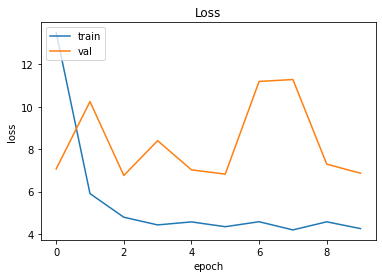

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Predictions on test data
y_pred= model.predict(X_test)
y_pred= np.square(y_pred)

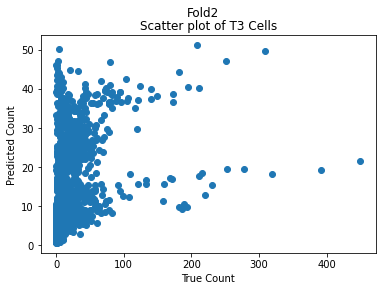

In [ ]:
ax= plt.scatter(Y_test, y_pred)
plt.xlabel('True Count')
plt.ylabel('Predicted Count')
plt.title('Scatter plot of T3 Cells')
plt.suptitle('Fold2')
plt.show()

**Performance Metrics**

In [ ]:
r2_test_NN2= r2_score(Y_test, y_pred)
rmse_test_NN2= mean_squared_error(Y_test, y_pred, squared=True)
pc_test_NN2= pearsonr(Y_test, y_pred)[0]
sc_test_NN2= spearmanr(Y_test, y_pred)[0]

df=pd.DataFrame({'model':['CNN'], 'r2 score': [r2_test_NN2], 'rmse': [rmse_test_NN2], 
              'pearson corr score':[pc_test_NN2], 'spearman corr score':[sc_test_NN2]}) 
print(df)

  model  r2 score        rmse     pearson corr score  spearman corr score
0   CNN  0.101353  975.441106  [0.35902237616304583]             0.574034


**CV Fold 3 -- Train and validate on Fold 2 and Fold 3, Test on Fold 1**

In [ ]:
index= np.where((F == 2) | (F == 3))                                            #taking fold-3 and fold-2 
                                                                                #indices for training
Y_tr= np.asarray(Y['lymphocyte'][index[0]])
Y_tr= Y_tr.reshape(Y_tr.shape[0],1)

X_tr=[]
for ind in index[0]:
  img= X[ind]
  image_resized = resize(img, (img.shape[0] // 2, img.shape[1] // 2),
                       anti_aliasing=True)
  X_tr.append(image_resized)

X_tr= np.asarray(X_tr)
X_tr= X_tr/255.0                                                                #normalized training samples

print(f'Training X samples shape: {X_tr.shape}')
print(f'Training Y samples shape: {Y_tr.shape}')

index= np.where((F == 1))                                                       #taking fold-1 indices for test
Y_test= Y['lymphocyte'][index[0]]

X_test=[]
for ind in index[0]:
  img= X[ind]
  image_resized = resize(img, (img.shape[0] // 2, img.shape[1] // 2),
                       anti_aliasing=True)
  X_test.append(image_resized)

X_test= np.asarray(X_test)
X_test= X_test/255.0                                                            #normalizing
print(f'Test X samples shape: {X_test.shape}')
print(f'Test Y samples shape: {Y_test.shape}')

Training X samples shape: (3359, 128, 128, 3)
Training Y samples shape: (3359, 1)
Test X samples shape: (1622, 128, 128, 3)
Test Y samples shape: (1622,)


In [ ]:
Y_tr= np.sqrt(Y_tr)

In [ ]:
batch_size = 50                   
epochs = 10

model = countT3model()
history = model.fit(X_tr, Y_tr,                                                 #fitting model on training set 
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          verbose=1                                            #validation of model run on validation set
          )

Epoch 1/10
54/54 [==============================] - 67s 1s/step - loss: 28.7119 - coeff_determination: -3.0135 - val_loss: 5.6285 - val_coeff_determination: -0.4355
Epoch 2/10
54/54 [==============================] - 66s 1s/step - loss: 7.8258 - coeff_determination: -0.0841 - val_loss: 5.5435 - val_coeff_determination: -0.3875
Epoch 3/10
54/54 [==============================] - 67s 1s/step - loss: 7.7463 - coeff_determination: -0.0589 - val_loss: 7.1178 - val_coeff_determination: -1.1613
Epoch 4/10
54/54 [==============================] - 66s 1s/step - loss: 7.9450 - coeff_determination: -0.1083 - val_loss: 5.5250 - val_coeff_determination: -0.3766
Epoch 5/10
54/54 [==============================] - 66s 1s/step - loss: 7.6573 - coeff_determination: -0.0404 - val_loss: 5.3975 - val_coeff_determination: -0.2914
Epoch 6/10
54/54 [==============================] - 70s 1s/step - loss: 7.8233 - coeff_determination: -0.0699 - val_loss: 5.5127 - val_coeff_determination: -0.2598
Epoch 7/10
54/5

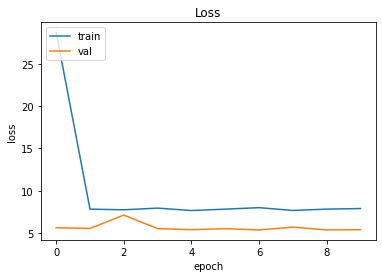

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Predictions on test data
y_pred= model.predict(X_test)
y_pred= np.square(y_pred)

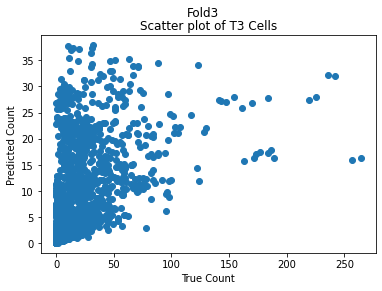

In [ ]:
ax= plt.scatter(Y_test, y_pred)
plt.xlabel('True Count')
plt.ylabel('Predicted Count')
plt.title('Scatter plot of T3 Cells')
plt.suptitle('Fold3')
plt.show()

**Performance Metrics**

In [ ]:
r2_test_NN3= r2_score(Y_test, y_pred)
rmse_test_NN3= mean_squared_error(Y_test, y_pred, squared=True)
pc_test_NN3= pearsonr(Y_test, y_pred)[0]
sc_test_NN3= spearmanr(Y_test, y_pred)[0]

df=pd.DataFrame({'model':['CNN'], 'r2 score': [r2_test_NN3], 'rmse': [rmse_test_NN3], 
              'pearson corr score':[pc_test_NN3], 'spearman corr score':[sc_test_NN3]}) 
print(df)

  model  r2 score        rmse    pearson corr score  spearman corr score
0   CNN  0.022108  808.186466  [0.4488564756726373]             0.617594


**Average of Cross Validation across 3 Folds**

In [ ]:
r2_s= [r2_test_NN1,r2_test_NN2,r2_test_NN3]
rmse =[rmse_test_NN1, rmse_test_NN2, rmse_test_NN3]
pc= [pc_test_NN1, pc_test_NN2, pc_test_NN3]
sc = [sc_test_NN1,sc_test_NN2,sc_test_NN3]

print(f'Mean of CV across 3 folds : {np.mean(r2_s)}')
print(f'Mean of CV across 3 folds : {np.mean(rmse)}')
print(f'Mean of CV across 3 folds : {np.mean(pc)}')
print(f'Mean of CV across 3 folds : {np.mean(sc)}')

Mean of CV across 3 folds : 0.08755666467905876
Mean of CV across 3 folds : 844.8215901790318
Mean of CV across 3 folds : 0.40877662527681285
Mean of CV across 3 folds : 0.6204048904093288


**c. Use a convolutional neural network (in Keras or Pytorch) to predict the counts of 6 types of cells simultaneously given the image patch as input and perform 3-fold cross-validation using the given folds. You are free to choose any network structure as long as you can show that it gives good cross-validation performance. Do 3-fold cross-validation using the specified folds and report the results for each test fold for each cell type in the form of separate predicted-vs-actual count scatter plots (3 folds, 6 cell types so 18 plots in total) using your optimal machine learning model and report your results in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score for each cell type and each fold separately along with the average of each cell type across the 3 folds. [15 Marks]**

Convolutional Neural network built with several layers. Output layer with 6 neurons with linear activation has been used to predict count of all 6 T1,T2,T3,T4,T5,T6 cells.

In [ ]:
def countsixmodel():
  model = Sequential()
  model.add(Conv2D(64, (3, 3), activation='relu', input_shape = input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(16, (3, 3), activation='relu'))

  model.add(Dropout(0.01))

  model.add(Flatten())
  
  model.add(Dense(64, activation='relu'))
  model.add(Dense(6, activation='linear'))

  model.compile(loss=keras.losses.MeanSquaredError(),   
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                    metrics=[coeff_determination] 
                   )

  #model.summary()
  return(model)

**CV Fold 1 -- Train and validate on Fold 1 and Fold 2, Test on Fold 3**

In [ ]:
index= np.where((F == 1) | (F == 2))                                            #taking fold-1 and fold-2 
                                                                                #indices for training
Y_tr= np.asarray(Y[['neutrophil', 'epithelial', 'lymphocyte', 'plasma', 'eosinophil',
       'connective']])
Y_tr= Y_tr[index[0]]

X_tr=[]
for ind in index[0]:
  img= X[ind]
  image_resized = resize(img, (img.shape[0] // 2, img.shape[1] // 2),
                       anti_aliasing=True)
  X_tr.append(image_resized)

X_tr= np.asarray(X_tr)
X_tr= X_tr/255.0                                                                #normalized training samples

print(f'Training X samples shape: {X_tr.shape}')
print(f'Training Y samples shape: {Y_tr.shape}')

index= np.where((F == 3))                                                       #taking fold-3 indices for test
Y_test= np.asarray(Y[['neutrophil', 'epithelial', 'lymphocyte', 'plasma', 'eosinophil',
       'connective']])
Y_test= Y_test[index[0]]

X_test=[]
for ind in index[0]:
  img= X[ind]
  image_resized = resize(img, (img.shape[0] // 2, img.shape[1] // 2),
                       anti_aliasing=True)
  X_test.append(image_resized)

X_test= np.asarray(X_test)
X_test= X_test/255.0                                                            #normalizing
print(f'Test X samples shape: {X_test.shape}')
print(f'Test Y samples shape: {Y_test.shape}')

Training X samples shape: (3373, 128, 128, 3)
Training Y samples shape: (3373, 6)
Test X samples shape: (1608, 128, 128, 3)
Test Y samples shape: (1608, 6)


In [ ]:
Y_tr= np.sqrt(Y_tr)

In [ ]:
batch_size = 50                   
epochs = 10

model = countsixmodel()
history = model.fit(X_tr, Y_tr,                                                 #fitting model on training set 
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          verbose=1                                            #validation of model run on validation set
          )

Epoch 1/10
54/54 [==============================] - 5s 88ms/step - loss: 5.0704 - coeff_determination: 0.3560 - val_loss: 4.3688 - val_coeff_determination: 0.5862
Epoch 2/10
54/54 [==============================] - 4s 77ms/step - loss: 3.9158 - coeff_determination: 0.5030 - val_loss: 4.2115 - val_coeff_determination: 0.6024
Epoch 3/10
54/54 [==============================] - 4s 77ms/step - loss: 3.6955 - coeff_determination: 0.5313 - val_loss: 3.4467 - val_coeff_determination: 0.6734
Epoch 4/10
54/54 [==============================] - 4s 77ms/step - loss: 3.6541 - coeff_determination: 0.5370 - val_loss: 3.3177 - val_coeff_determination: 0.6858
Epoch 5/10
54/54 [==============================] - 4s 77ms/step - loss: 3.6104 - coeff_determination: 0.5426 - val_loss: 3.8319 - val_coeff_determination: 0.6366
Epoch 6/10
54/54 [==============================] - 4s 78ms/step - loss: 3.6597 - coeff_determination: 0.5373 - val_loss: 4.3398 - val_coeff_determination: 0.5898
Epoch 7/10
54/54 [====

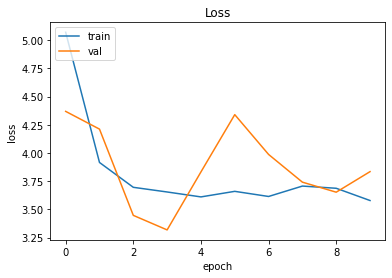

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Predictions on test data
y_pred= model.predict(X_test)
y_pred= np.square(y_pred)

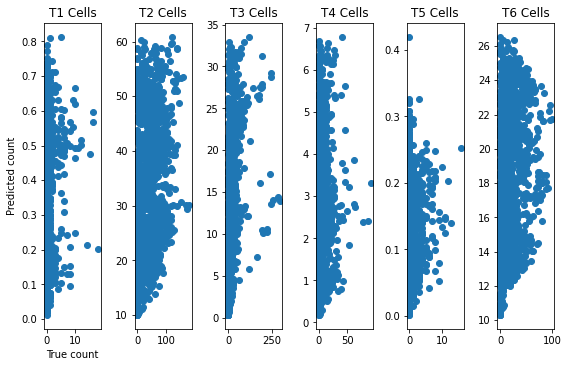

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(8, 5.2))
ax1.scatter(Y_test[:,0], y_pred[:,0])
ax1.set_title('T1 Cells')
ax1.set_xlabel('True count')
ax1.set_ylabel('Predicted count')
ax2.scatter(Y_test[:,1], y_pred[:,1])
ax2.set_title('T2 Cells')
ax3.scatter(Y_test[:,2], y_pred[:,2])
ax3.set_title('T3 Cells')
ax4.scatter(Y_test[:,3], y_pred[:,3])
ax4.set_title('T4 Cells')
ax5.scatter(Y_test[:,4], y_pred[:,4])
ax5.set_title('T5 Cells')
ax6.scatter(Y_test[:,5], y_pred[:,5])
ax6.set_title('T6 Cells')
plt.tight_layout()

In [ ]:
Y_test[:,0]=np.squeeze(Y_test[:,0])
r2_cv1_T1= r2_score(Y_test[:,0], y_pred[:,0])
rmse_cv1_T1= mean_squared_error(Y_test[:,0], y_pred[:,0], squared=True)
pc_cv1_T1= pearsonr(Y_test[:,0], y_pred[:,0])[0]
sc_cv1_T1= spearmanr(Y_test[:,0], y_pred[:,0])[0]
print(f'r2 score for T1 cells: {r2_cv1_T1}')
print(f'rmse score for T1 cells: {rmse_cv1_T1}')
print(f'pearson correlation score for T1 cells: {pc_cv1_T1}')
print(f'spearman correlation score for T1 cells: {sc_cv1_T1}')
Y_test[:,1]=np.squeeze(Y_test[:,1])
r2_cv1_T2= r2_score(Y_test[:,1], y_pred[:,1])
rmse_cv1_T2= mean_squared_error(Y_test[:,1], y_pred[:,1], squared=True)
pc_cv1_T2= pearsonr(Y_test[:,1], y_pred[:,1])[0]
sc_cv1_T2= spearmanr(Y_test[:,1], y_pred[:,1])[0]
print(f'r2 score for T2 cells: {r2_cv1_T2}')
print(f'rmse score for T2 cells: {rmse_cv1_T2}')
print(f'pearson correlation score for T2 cells: {pc_cv1_T2}')
print(f'spearman correlation score for T2 cells: {sc_cv1_T2}')
Y_test[:,2]=np.squeeze(Y_test[:,2])
r2_cv1_T3= r2_score(Y_test[:,2], y_pred[:,2])
rmse_cv1_T3= mean_squared_error(Y_test[:,2], y_pred[:,2], squared=True)
pc_cv1_T3= pearsonr(Y_test[:,2], y_pred[:,2])[0]
sc_cv1_T3= spearmanr(Y_test[:,2], y_pred[:,2])[0]
print(f'r2 score for T3 cells: {r2_cv1_T3}')
print(f'rmse score for T3 cells: {rmse_cv1_T3}')
print(f'pearson correlation score for T3 cells: {pc_cv1_T3}')
print(f'spearman correlation score for T3 cells: {sc_cv1_T3}')
Y_test[:,3]=np.squeeze(Y_test[:,3])
r2_cv1_T4= r2_score(Y_test[:,3], y_pred[:,3])
rmse_cv1_T4= mean_squared_error(Y_test[:,3], y_pred[:,3], squared=True)
pc_cv1_T4= pearsonr(Y_test[:,3], y_pred[:,3])[0]
sc_cv1_T4= spearmanr(Y_test[:,3], y_pred[:,3])[0]
print(f'r2 score for T4 cells: {r2_cv1_T4}')
print(f'rmse score for T4 cells: {rmse_cv1_T4}')
print(f'pearson correlation score for T4 cells: {pc_cv1_T4}')
print(f'spearman correlation score for T4 cells: {sc_cv1_T4}')
Y_test[:,4]=np.squeeze(Y_test[:,4])
r2_cv1_T5= r2_score(Y_test[:,4], y_pred[:,4])
rmse_cv1_T5= mean_squared_error(Y_test[:,4], y_pred[:,4], squared=True)
pc_cv1_T5= pearsonr(Y_test[:,4], y_pred[:,4])[0]
sc_cv1_T5= spearmanr(Y_test[:,4], y_pred[:,4])[0]
print(f'r2 score for T5 cells: {r2_cv1_T5}')
print(f'rmse score for T5 cells: {rmse_cv1_T5}')
print(f'pearson correlation score for T5 cells: {pc_cv1_T5}')
print(f'spearman correlation score for T5 cells: {sc_cv1_T5}')
Y_test[:,4]=np.squeeze(Y_test[:,5])
r2_cv1_T6= r2_score(Y_test[:,5], y_pred[:,5])
rmse_cv1_T6= mean_squared_error(Y_test[:,5], y_pred[:,5], squared=True)
pc_cv1_T6= pearsonr(Y_test[:,5], y_pred[:,5])[0]
sc_cv1_T6= spearmanr(Y_test[:,5], y_pred[:,5])[0]
print(f'r2 score for T6 cells: {r2_cv1_T6}')
print(f'rmse score for T6 cells: {rmse_cv1_T6}')
print(f'pearson correlation score for T6 cells: {pc_cv1_T6}')
print(f'spearman correlation score for T6 cells: {sc_cv1_T6}')

r2 score for T1 cells: 0.01848151183791702
rmse score for T1 cells: 2.601328584804128
pearson correlation score for T1 cells: 0.20601316640728254
spearman correlation score for T1 cells: 0.241350895093366
r2 score for T2 cells: 0.08679575154813601
rmse score for T2 cells: 1061.307418023836
pearson correlation score for T2 cells: 0.3600778719197324
spearman correlation score for T2 cells: 0.39741759779016034
r2 score for T3 cells: 0.1286861652045087
rmse score for T3 cells: 760.7559956137452
pearson correlation score for T3 cells: 0.4230408688456188
spearman correlation score for T3 cells: 0.6699386049228648
r2 score for T4 cells: -0.0335954824345559
rmse score for T4 cells: 76.85699601253687
pearson correlation score for T4 cells: 0.17672560440196408
spearman correlation score for T4 cells: 0.3919190070747941
r2 score for T5 cells: -0.08643567035793898
rmse score for T5 cells: 2.748691103329635
pearson correlation score for T5 cells: 0.22363153159429577
spearman correlation score for T

In [ ]:
df_cv1= pd.DataFrame({'fold':'cv1', 'r2_t1':[r2_cv1_T1], 'rmse_t1':[rmse_cv1_T1], 'pc_t1':[pc_cv1_T1],'sc_t1':[sc_cv1_T1], 
              'r2_t2':[r2_cv1_T2], 'rmse_t2':[rmse_cv1_T2], 'pc_t2':[pc_cv1_T2],'sc_t2':[sc_cv1_T2],
              'r2_t3':[r2_cv1_T3], 'rmse_t3':[rmse_cv1_T3], 'pc_t3':[pc_cv1_T3],'sc_t3':[sc_cv1_T3],
              'r2_t4':[r2_cv1_T4], 'rmse_t4':[rmse_cv1_T4], 'pc_t4':[pc_cv1_T4],'sc_t4':[sc_cv1_T4],
              'r2_t5':[r2_cv1_T5], 'rmse_t5':[rmse_cv1_T5], 'pc_t5':[pc_cv1_T5],'sc_t5':[sc_cv1_T5],
              'r2_t6':[r2_cv1_T6], 'rmse_t6':[rmse_cv1_T6], 'pc_t6':[pc_cv1_T6],'sc_t6':[sc_cv1_T6]})

**CV Fold 2 -- Train and validate on Fold 1 and Fold 3, Test on Fold 2**

In [ ]:
index= np.where((F == 1) | (F == 3))                                            #taking fold-1 and fold-3 
                                                                                #indices for training
Y_tr= np.asarray(Y[['neutrophil', 'epithelial', 'lymphocyte', 'plasma', 'eosinophil',
       'connective']])
Y_tr= Y_tr[index[0]]

X_tr=[]
for ind in index[0]:
  img= X[ind]
  image_resized = resize(img, (img.shape[0] // 2, img.shape[1] // 2),
                       anti_aliasing=True)
  X_tr.append(image_resized)

X_tr= np.asarray(X_tr)
X_tr= X_tr/255.0                                                                #normalized training samples

print(f'Training X samples shape: {X_tr.shape}')
print(f'Training Y samples shape: {Y_tr.shape}')

index= np.where((F == 2))                                                       #taking fold-2 indices for test
Y_test= np.asarray(Y[['neutrophil', 'epithelial', 'lymphocyte', 'plasma', 'eosinophil',
       'connective']])
Y_test= Y_test[index[0]]

X_test=[]
for ind in index[0]:
  img= X[ind]
  image_resized = resize(img, (img.shape[0] // 2, img.shape[1] // 2),
                       anti_aliasing=True)
  X_test.append(image_resized)

X_test= np.asarray(X_test)
X_test= X_test/255.0                                                            #normalizing
print(f'Test X samples shape: {X_test.shape}')
print(f'Test Y samples shape: {Y_test.shape}')

Training X samples shape: (3230, 128, 128, 3)
Training Y samples shape: (3230, 6)
Test X samples shape: (1751, 128, 128, 3)
Test Y samples shape: (1751, 6)


In [ ]:
Y_tr= np.sqrt(Y_tr)

In [ ]:
batch_size = 50                   
epochs = 20

model = countsixmodel()
history = model.fit(X_tr, Y_tr,                                                 #fitting model on training set 
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          verbose=1                                            #validation of model run on validation set
          )

Epoch 1/20
52/52 [==============================] - 5s 85ms/step - loss: 5.1060 - coeff_determination: 0.3447 - val_loss: 5.5919 - val_coeff_determination: 0.4644
Epoch 2/20
52/52 [==============================] - 4s 77ms/step - loss: 4.2036 - coeff_determination: 0.4599 - val_loss: 4.4152 - val_coeff_determination: 0.5744
Epoch 3/20
52/52 [==============================] - 4s 77ms/step - loss: 3.8543 - coeff_determination: 0.5067 - val_loss: 4.8977 - val_coeff_determination: 0.5265
Epoch 4/20
52/52 [==============================] - 4s 76ms/step - loss: 3.7930 - coeff_determination: 0.5132 - val_loss: 4.7427 - val_coeff_determination: 0.5429
Epoch 5/20
52/52 [==============================] - 4s 77ms/step - loss: 3.8664 - coeff_determination: 0.5031 - val_loss: 3.8019 - val_coeff_determination: 0.6337
Epoch 6/20
52/52 [==============================] - 4s 77ms/step - loss: 3.7263 - coeff_determination: 0.5203 - val_loss: 3.9457 - val_coeff_determination: 0.6190
Epoch 7/20
52/52 [====

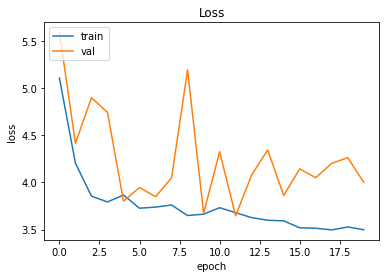

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Predictions on test data
y_pred= model.predict(X_test)
y_pred= np.square(y_pred)

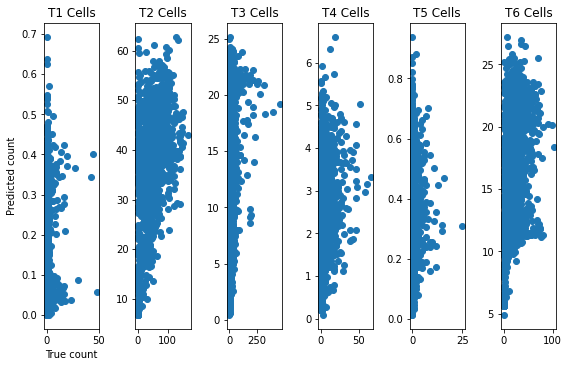

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(8, 5.2))
ax1.scatter(Y_test[:,0], y_pred[:,0])
ax1.set_title('T1 Cells')
ax1.set_xlabel('True count')
ax1.set_ylabel('Predicted count')
ax2.scatter(Y_test[:,1], y_pred[:,1])
ax2.set_title('T2 Cells')
ax3.scatter(Y_test[:,2], y_pred[:,2])
ax3.set_title('T3 Cells')
ax4.scatter(Y_test[:,3], y_pred[:,3])
ax4.set_title('T4 Cells')
ax5.scatter(Y_test[:,4], y_pred[:,4])
ax5.set_title('T5 Cells')
ax6.scatter(Y_test[:,5], y_pred[:,5])
ax6.set_title('T6 Cells')
plt.tight_layout()

In [ ]:
Y_test[:,0]=np.squeeze(Y_test[:,0])
r2_cv2_T1= r2_score(Y_test[:,0], y_pred[:,0])
rmse_cv2_T1= mean_squared_error(Y_test[:,0], y_pred[:,0], squared=True)
pc_cv2_T1= pearsonr(Y_test[:,0], y_pred[:,0])[0]
sc_cv2_T1= spearmanr(Y_test[:,0], y_pred[:,0])[0]
print(f'r2 score for T1 cells: {r2_cv2_T1}')
print(f'rmse score for T1 cells: {rmse_cv2_T1}')
print(f'pearson correlation score for T1 cells: {pc_cv2_T1}')
print(f'spearman correlation score for T1 cells: {sc_cv2_T1}')
Y_test[:,1]=np.squeeze(Y_test[:,1])
r2_cv2_T2= r2_score(Y_test[:,1], y_pred[:,1])
rmse_cv2_T2= mean_squared_error(Y_test[:,1], y_pred[:,1], squared=True)
pc_cv2_T2= pearsonr(Y_test[:,1], y_pred[:,1])[0]
sc_cv2_T2= spearmanr(Y_test[:,1], y_pred[:,1])[0]
print(f'r2 score for T2 cells: {r2_cv2_T2}')
print(f'rmse score for T2 cells: {rmse_cv2_T2}')
print(f'pearson correlation score for T2 cells: {pc_cv2_T2}')
print(f'spearman correlation score for T2 cells: {sc_cv2_T2}')
Y_test[:,2]=np.squeeze(Y_test[:,2])
r2_cv2_T3= r2_score(Y_test[:,2], y_pred[:,2])
rmse_cv2_T3= mean_squared_error(Y_test[:,2], y_pred[:,2], squared=True)
pc_cv2_T3= pearsonr(Y_test[:,2], y_pred[:,2])[0]
sc_cv2_T3= spearmanr(Y_test[:,2], y_pred[:,2])[0]
print(f'r2 score for T3 cells: {r2_cv2_T3}')
print(f'rmse score for T3 cells: {rmse_cv2_T3}')
print(f'pearson correlation score for T3 cells: {pc_cv2_T3}')
print(f'spearman correlation score for T3 cells: {sc_cv2_T3}')
Y_test[:,3]=np.squeeze(Y_test[:,3])
r2_cv2_T4= r2_score(Y_test[:,3], y_pred[:,3])
rmse_cv2_T4= mean_squared_error(Y_test[:,3], y_pred[:,3], squared=True)
pc_cv2_T4= pearsonr(Y_test[:,3], y_pred[:,3])[0]
sc_cv2_T4= spearmanr(Y_test[:,3], y_pred[:,3])[0]
print(f'r2 score for T4 cells: {r2_cv2_T4}')
print(f'rmse score for T4 cells: {rmse_cv2_T4}')
print(f'pearson correlation score for T4 cells: {pc_cv2_T4}')
print(f'spearman correlation score for T4 cells: {sc_cv2_T4}')
Y_test[:,4]=np.squeeze(Y_test[:,4])
r2_cv2_T5= r2_score(Y_test[:,4], y_pred[:,4])
rmse_cv2_T5= mean_squared_error(Y_test[:,4], y_pred[:,4], squared=True)
pc_cv2_T5= pearsonr(Y_test[:,4], y_pred[:,4])[0]
sc_cv2_T5= spearmanr(Y_test[:,4], y_pred[:,4])[0]
print(f'r2 score for T5 cells: {r2_cv2_T5}')
print(f'rmse score for T5 cells: {rmse_cv2_T5}')
print(f'pearson correlation score for T5 cells: {pc_cv2_T5}')
print(f'spearman correlation score for T5 cells: {sc_cv2_T5}')
Y_test[:,4]=np.squeeze(Y_test[:,5])
r2_cv2_T6= r2_score(Y_test[:,5], y_pred[:,5])
rmse_cv2_T6= mean_squared_error(Y_test[:,5], y_pred[:,5], squared=True)
pc_cv2_T6= pearsonr(Y_test[:,5], y_pred[:,5])[0]
sc_cv2_T6= spearmanr(Y_test[:,5], y_pred[:,5])[0]
print(f'r2 score for T6 cells: {r2_cv2_T6}')
print(f'rmse score for T6 cells: {rmse_cv2_T6}')
print(f'pearson correlation score for T6 cells: {pc_cv2_T6}')
print(f'spearman correlation score for T6 cells: {sc_cv2_T6}')

r2 score for T1 cells: -0.06535589205994974
rmse score for T1 cells: 10.670426702581356
pearson correlation score for T1 cells: 0.1056165910386576
spearman correlation score for T1 cells: 0.07218224772253518
r2 score for T2 cells: 0.13934536728311164
rmse score for T2 cells: 954.8748526771049
pearson correlation score for T2 cells: 0.47336878843808855
spearman correlation score for T2 cells: 0.447303922759035
r2 score for T3 cells: 0.04508573856095843
rmse score for T3 cells: 1036.5171655718539
pearson correlation score for T3 cells: 0.3429673351539708
spearman correlation score for T3 cells: 0.5212854921762408
r2 score for T4 cells: -0.02235160481816556
rmse score for T4 cells: 57.97224944807877
pearson correlation score for T4 cells: 0.2554130971379661
spearman correlation score for T4 cells: 0.3573827125781889
r2 score for T5 cells: -0.016094368015095784
rmse score for T5 cells: 2.787910829903291
pearson correlation score for T5 cells: 0.11776704439573321
spearman correlation score 

In [ ]:
df_cv2= pd.DataFrame({'fold':'cv2', 'r2_t1':[r2_cv2_T1], 'rmse_t1':[rmse_cv2_T1], 'pc_t1':[pc_cv2_T1],'sc_t1':[sc_cv2_T1], 
              'r2_t2':[r2_cv2_T2], 'rmse_t2':[rmse_cv2_T2], 'pc_t2':[pc_cv2_T2],'sc_t2':[sc_cv2_T2],
              'r2_t3':[r2_cv2_T3], 'rmse_t3':[rmse_cv2_T3], 'pc_t3':[pc_cv2_T3],'sc_t3':[sc_cv2_T3],
              'r2_t4':[r2_cv2_T4], 'rmse_t4':[rmse_cv2_T4], 'pc_t4':[pc_cv2_T4],'sc_t4':[sc_cv2_T4],
              'r2_t5':[r2_cv2_T5], 'rmse_t5':[rmse_cv2_T5], 'pc_t5':[pc_cv2_T5],'sc_t5':[sc_cv2_T5],
              'r2_t6':[r2_cv2_T6], 'rmse_t6':[rmse_cv2_T6], 'pc_t6':[pc_cv2_T6],'sc_t6':[sc_cv2_T6]})

**CV Fold 3 -- Train and validate on Fold 2 and Fold 3, Test on Fold 1**

In [ ]:
index= np.where((F == 2) | (F == 3))                                            #taking fold-3 and fold-2 
                                                                                #indices for training
Y_tr= np.asarray(Y[['neutrophil', 'epithelial', 'lymphocyte', 'plasma', 'eosinophil',
       'connective']])
Y_tr= Y_tr[index[0]]

X_tr=[]
for ind in index[0]:
  img= X[ind]
  image_resized = resize(img, (img.shape[0] // 2, img.shape[1] // 2),
                       anti_aliasing=True)
  X_tr.append(image_resized)

X_tr= np.asarray(X_tr)
X_tr= X_tr/255.0                                                                #normalized training samples

print(f'Training X samples shape: {X_tr.shape}')
print(f'Training Y samples shape: {Y_tr.shape}')

index= np.where((F == 1))                                                       #taking fold-1 indices for test
Y_test= np.asarray(Y[['neutrophil', 'epithelial', 'lymphocyte', 'plasma', 'eosinophil',
       'connective']])
Y_test= Y_test[index[0]]

X_test=[]
for ind in index[0]:
  img= X[ind]
  image_resized = resize(img, (img.shape[0] // 2, img.shape[1] // 2),
                       anti_aliasing=True)
  X_test.append(image_resized)

X_test= np.asarray(X_test)
X_test= X_test/255.0                                                            #normalizing
print(f'Test X samples shape: {X_test.shape}')
print(f'Test Y samples shape: {Y_test.shape}')

Training X samples shape: (3359, 128, 128, 3)
Training Y samples shape: (3359, 6)
Test X samples shape: (1622, 128, 128, 3)
Test Y samples shape: (1622, 6)


In [ ]:
Y_tr= np.sqrt(Y_tr)

In [ ]:
batch_size = 50                   
epochs = 20

model = countsixmodel()
history = model.fit(X_tr, Y_tr,                                                 #fitting model on training set 
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          verbose=1                                            #validation of model run on validation set
          )

Epoch 1/20
54/54 [==============================] - 5s 82ms/step - loss: 5.4370 - coeff_determination: 0.2778 - val_loss: 4.9744 - val_coeff_determination: 0.4756
Epoch 2/20
54/54 [==============================] - 4s 76ms/step - loss: 4.1322 - coeff_determination: 0.4522 - val_loss: 4.4161 - val_coeff_determination: 0.5331
Epoch 3/20
54/54 [==============================] - 4s 77ms/step - loss: 3.7250 - coeff_determination: 0.5089 - val_loss: 4.1379 - val_coeff_determination: 0.5550
Epoch 4/20
54/54 [==============================] - 4s 76ms/step - loss: 3.7649 - coeff_determination: 0.5030 - val_loss: 4.0965 - val_coeff_determination: 0.5621
Epoch 5/20
54/54 [==============================] - 4s 76ms/step - loss: 3.6158 - coeff_determination: 0.5230 - val_loss: 4.3438 - val_coeff_determination: 0.5418
Epoch 6/20
54/54 [==============================] - 4s 77ms/step - loss: 3.5679 - coeff_determination: 0.5276 - val_loss: 4.4961 - val_coeff_determination: 0.5256
Epoch 7/20
54/54 [====

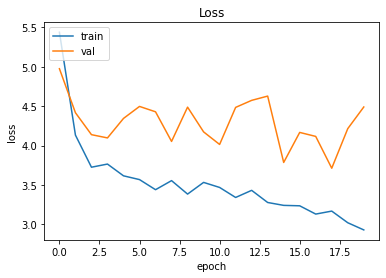

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Predictions on test data
y_pred= model.predict(X_test)
y_pred= np.square(y_pred)

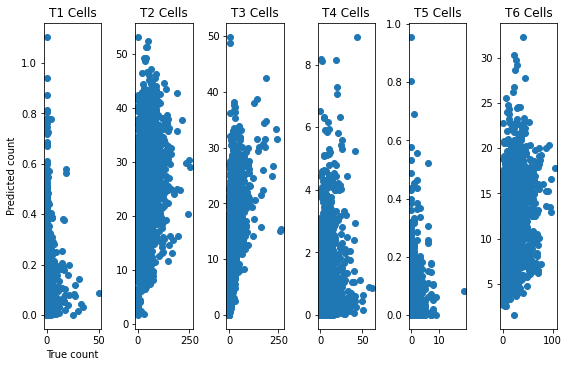

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(8, 5.2))
ax1.scatter(Y_test[:,0], y_pred[:,0])
ax1.set_title('T1 Cells')
ax1.set_xlabel('True count')
ax1.set_ylabel('Predicted count')
ax2.scatter(Y_test[:,1], y_pred[:,1])
ax2.set_title('T2 Cells')
ax3.scatter(Y_test[:,2], y_pred[:,2])
ax3.set_title('T3 Cells')
ax4.scatter(Y_test[:,3], y_pred[:,3])
ax4.set_title('T4 Cells')
ax5.scatter(Y_test[:,4], y_pred[:,4])
ax5.set_title('T5 Cells')
ax6.scatter(Y_test[:,5], y_pred[:,5])
ax6.set_title('T6 Cells')
plt.tight_layout()

In [ ]:
Y_test[:,0]=np.squeeze(Y_test[:,0])
r2_cv3_T1= r2_score(Y_test[:,0], y_pred[:,0])
rmse_cv3_T1= mean_squared_error(Y_test[:,0], y_pred[:,0], squared=True)
pc_cv3_T1= pearsonr(Y_test[:,0], y_pred[:,0])[0]
sc_cv3_T1= spearmanr(Y_test[:,0], y_pred[:,0])[0]
print(f'r2 score for T1 cells: {r2_cv3_T1}')
print(f'rmse score for T1 cells: {rmse_cv3_T1}')
print(f'pearson correlation score for T1 cells: {pc_cv3_T1}')
print(f'spearman correlation score for T1 cells: {sc_cv3_T1}')
Y_test[:,1]=np.squeeze(Y_test[:,1])
r2_cv3_T2= r2_score(Y_test[:,1], y_pred[:,1])
rmse_cv3_T2= mean_squared_error(Y_test[:,1], y_pred[:,1], squared=True)
pc_cv3_T2= pearsonr(Y_test[:,1], y_pred[:,1])[0]
sc_cv3_T2= spearmanr(Y_test[:,1], y_pred[:,1])[0]
print(f'r2 score for T2 cells: {r2_cv3_T2}')
print(f'rmse score for T2 cells: {rmse_cv3_T2}')
print(f'pearson correlation score for T2 cells: {pc_cv3_T2}')
print(f'spearman correlation score for T2 cells: {sc_cv3_T2}')
Y_test[:,2]=np.squeeze(Y_test[:,2])
r2_cv3_T3= r2_score(Y_test[:,2], y_pred[:,2])
rmse_cv3_T3= mean_squared_error(Y_test[:,2], y_pred[:,2], squared=True)
pc_cv3_T3= pearsonr(Y_test[:,2], y_pred[:,2])[0]
sc_cv3_T3= spearmanr(Y_test[:,2], y_pred[:,2])[0]
print(f'r2 score for T3 cells: {r2_cv3_T3}')
print(f'rmse score for T3 cells: {rmse_cv3_T3}')
print(f'pearson correlation score for T3 cells: {pc_cv3_T3}')
print(f'spearman correlation score for T3 cells: {sc_cv3_T3}')
Y_test[:,3]=np.squeeze(Y_test[:,3])
r2_cv3_T4= r2_score(Y_test[:,3], y_pred[:,3])
rmse_cv3_T4= mean_squared_error(Y_test[:,3], y_pred[:,3], squared=True)
pc_cv3_T4= pearsonr(Y_test[:,3], y_pred[:,3])[0]
sc_cv3_T4= spearmanr(Y_test[:,3], y_pred[:,3])[0]
print(f'r2 score for T4 cells: {r2_cv3_T4}')
print(f'rmse score for T4 cells: {rmse_cv3_T4}')
print(f'pearson correlation score for T4 cells: {pc_cv3_T4}')
print(f'spearman correlation score for T4 cells: {sc_cv3_T4}')
Y_test[:,4]=np.squeeze(Y_test[:,4])
r2_cv3_T5= r2_score(Y_test[:,4], y_pred[:,4])
rmse_cv3_T5= mean_squared_error(Y_test[:,4], y_pred[:,4], squared=True)
pc_cv3_T5= pearsonr(Y_test[:,4], y_pred[:,4])[0]
sc_cv3_T5= spearmanr(Y_test[:,4], y_pred[:,4])[0]
print(f'r2 score for T5 cells: {r2_cv3_T5}')
print(f'rmse score for T5 cells: {rmse_cv3_T5}')
print(f'pearson correlation score for T5 cells: {pc_cv3_T5}')
print(f'spearman correlation score for T5 cells: {sc_cv3_T5}')
Y_test[:,4]=np.squeeze(Y_test[:,5])
r2_cv3_T6= r2_score(Y_test[:,5], y_pred[:,5])
rmse_cv3_T6= mean_squared_error(Y_test[:,5], y_pred[:,5], squared=True)
pc_cv3_T6= pearsonr(Y_test[:,5], y_pred[:,5])[0]
sc_cv3_T6= spearmanr(Y_test[:,5], y_pred[:,5])[0]
print(f'r2 score for T6 cells: {r2_cv3_T6}')
print(f'rmse score for T6 cells: {rmse_cv3_T6}')
print(f'pearson correlation score for T6 cells: {pc_cv3_T6}')
print(f'spearman correlation score for T6 cells: {sc_cv3_T6}')


r2 score for T1 cells: -0.05472133750709629
rmse score for T1 cells: 12.52918789760596
pearson correlation score for T1 cells: -0.055492868535200274
spearman correlation score for T1 cells: -0.021795611665295856
r2 score for T2 cells: -0.35562640923002853
rmse score for T2 cells: 1919.4529714926668
pearson correlation score for T2 cells: 0.35449212322854373
spearman correlation score for T2 cells: 0.37806538045790267
r2 score for T3 cells: 0.15169941248337881
rmse score for T3 cells: 701.0844094313369
pearson correlation score for T3 cells: 0.518512033523525
spearman correlation score for T3 cells: 0.6857544989388364
r2 score for T4 cells: -0.27197547033509606
rmse score for T4 cells: 85.61415818581507
pearson correlation score for T4 cells: 0.23394427180735244
spearman correlation score for T4 cells: 0.30658962021939157
r2 score for T5 cells: -0.15376700177182534
rmse score for T5 cells: 2.038602782695244
pearson correlation score for T5 cells: 0.06510403535154484
spearman correlation

In [ ]:
df_cv3= pd.DataFrame({'fold':'cv2', 'r2_t1':[r2_cv3_T1], 'rmse_t1':[rmse_cv3_T1], 'pc_t1':[pc_cv3_T1],'sc_t1':[sc_cv3_T1], 
              'r2_t2':[r2_cv3_T2], 'rmse_t2':[rmse_cv3_T2], 'pc_t2':[pc_cv3_T2],'sc_t2':[sc_cv3_T2],
              'r2_t3':[r2_cv3_T3], 'rmse_t3':[rmse_cv3_T3], 'pc_t3':[pc_cv3_T3],'sc_t3':[sc_cv3_T3],
              'r2_t4':[r2_cv3_T4], 'rmse_t4':[rmse_cv3_T4], 'pc_t4':[pc_cv3_T4],'sc_t4':[sc_cv3_T4],
              'r2_t5':[r2_cv3_T5], 'rmse_t5':[rmse_cv3_T5], 'pc_t5':[pc_cv3_T5],'sc_t5':[sc_cv3_T5],
              'r2_t6':[r2_cv3_T6], 'rmse_t6':[rmse_cv3_T6], 'pc_t6':[pc_cv3_T6],'sc_t6':[sc_cv3_T6]})

**Average of performance metrics across 3 folds**

In [ ]:
d=pd.concat([df_cv1,df_cv2])
df_f=pd.concat([d,df_cv3])
df_f.describe()

,r2_t1,rmse_t1,pc_t1,sc_t1,r2_t2,rmse_t2,pc_t2,sc_t2,r2_t3,rmse_t3,...,pc_t4,sc_t4,r2_t5,rmse_t5,pc_t5,sc_t5,r2_t6,rmse_t6,pc_t6,sc_t6
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,-0.033865,8.600314,0.085379,0.097246,-0.043162,1311.878414,0.395980,0.407596,0.108490,832.785857,...,0.222028,0.351964,-0.085432,2.525068,0.135501,0.176828,-0.044736,307.309122,0.272985,0.303372
std,0.045644,5.277748,0.131922,0.133352,0.271875,528.859249,0.067079,0.035724,0.056103,178.941357,...,0.040675,0.042922,0.068842,0.421748,0.080738,0.115320,0.165775,57.174964,0.051720,0.048314
min,-0.065356,2.601329,-0.055493,-0.021796,-0.355626,954.874853,0.354492,0.378065,0.045086,701.084409,...,0.176726,0.306590,-0.153767,2.038603,0.065104,0.050362,-0.236026,248.022963,0.213583,0.248756
25%,-0.060039,6.635878,0.025062,0.025193,-0.134415,1008.091135,0.357285,0.387741,0.086886,730.920203,...,0.205335,0.331986,-0.120101,2.393647,0.091436,0.127159,-0.095618,279.909427,0.255467,0.284795
50%,-0.054721,10.670427,0.105617,0.072182,0.086796,1061.307418,0.360078,0.397418,0.128686,760.755996,...,0.233944,0.357383,-0.086436,2.748691,0.117767,0.203957,0.044791,311.795891,0.297352,0.320834
75%,-0.018120,11.599807,0.155815,0.156767,0.113071,1490.380195,0.416723,0.422361,0.140193,898.636581,...,0.244679,0.374651,-0.051265,2.768301,0.170699,0.240061,0.050909,336.952201,0.302686,0.330681
max,0.018482,12.529188,0.206013,0.241351,0.139345,1919.452971,0.473369,0.447304,0.151699,1036.517166,...,0.255413,0.391919,-0.016094,2.787911,0.223632,0.276165,0.057026,362.108512,0.308021,0.340528


**Comparing models based on performance metrics for Test Data**

In [ ]:
df=pd.DataFrame({'model':['OLS', 'SVR', 'CNN'], 
                 'r2 score': [r2_test_OLS,r2_test_SVR, np.mean(r2_s) ],
                 'rmse': [rmse_test_OLS,rmse_test_SVR, np.mean(rmse) ], 
                'pearson corr score':[pc_test_OLS,pc_test_SVR, np.mean(pc) ], 
                'spearman corr score':[sc_test_OLS,sc_test_SVR, np.mean(sc)]}) 
print(df)

  model  r2 score        rmse  pearson corr score  spearman corr score
0   OLS  0.284121  625.043553            0.561600             0.642111
1   SVR  0.353582  564.396784            0.611692             0.700359
2   CNN  0.087557  844.821590            0.408777             0.620405
